# Test Lidar 2

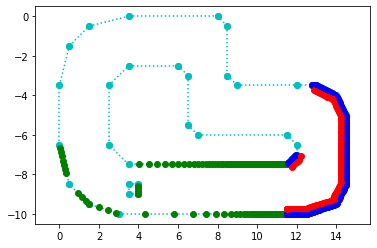

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
from zonesafe import *
from adaptevitesserelat import *
from trouvecible import *
from environment import *
from lidar import *

#afficher le circuit

envir=environment()
n=len(envir)
i=0
while i<n:
    nn=len(envir[i])
    j=0
    while j<(nn-1):
        plt.plot([envir[i][j][0],envir[i][j+1][0]],[envir[i][j][1],envir[i][j+1][1]],"c:o")
        j+=1
    i+=1
    
i=0
position=[11.5,-9.5]
orientation=0
N=360
rv=0.2
m=0.05
alphainc=360/N

M=lidar(envir,position,orientation,N)
MMMR=zonesafe(M,rv,m)
x=position[0]    
y=position[1]

while i<len(M):
    r=M[i][1]
    xl=r*cos((M[i][0]*alphainc+orientation)*2*pi/360)+x
    yl=r*sin((M[i][0]*alphainc+orientation)*2*pi/360)+y
    plt.plot(xl, yl,"g:o")
    i+=1
i=0
#callage de MMMR dans notre repère avec position et orientation
while i<len(MMMR):
    xl=MMMR[i][2] #abscisse du pt lidar dans le ref du lidar 
    yl=MMMR[i][3]
    theta=MMMR[i][0] #nb inc angle de coord polaires dans le ref du lidar
    thetac=(theta*alphainc+orientation)*2*pi/360  #angle de coord polaires dans le ref absolu
    r=MMMR[i][1]
    xlc=r*cos(thetac)+x #rcos(thetac) =abscisse dans le ref du lidar rotationné de orientation xlc=abscisse dans le ref absolu
    ylc=r*sin(thetac)+y

    xlp=MMMR[i][4] #abscisse du pt lidar dans le ref du lidar 
    ylp=MMMR[i][5]
    thetap=atan((ylp)/(xlp))
    if xlp<0:
        thetap=pi+atan(ylp/xlp)
    thetacp=thetap+orientation*2*pi/360
    rp=sqrt(xlp**2+ylp**2)
    xlpc=rp*cos(thetacp)+x
    ylpc=rp*sin(thetacp)+y


    plt.plot(xlc, ylc,"b:o")
    plt.plot(xlpc,ylpc,"r:o")
    i+=1
plt.axis('equal')   
plt.show()

#lidar testé avec succès après 6h de débugage


# Simulation de la trajetoire 2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
ERREUR pas de cible optimale
101
102
103
ERREUR pas de cible optimale
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


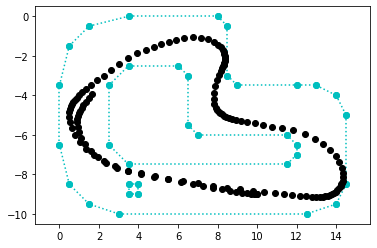

In [1]:
#simulation de trajectoire:

import matplotlib.pyplot as plt
import numpy as np
import copy
from zonesafe import *
from adaptevitesserelat import *
from trouvecible import *
from environment import *
from lidar import *
from actualise import *
from actualise2 import *
from params import *
from calculrayoncourbure import *
from math import *
from objectif import *

trajectoirex=[]
trajectoirey=[]
trajectoireor=[]

#initialisation

envir=environment()
[positioninit, p2, orientationinit, o2, vinit, vi2, deltat,amaxlat,epsilonmax,amax,amin,tsb,l,larg,vmax,N,rv,m,alpha,lanti]=params()
alphainc=360/N
position=positioninit
orientation=orientationinit

v=vinit
positionm1=positioninit
orientationm1=orientationinit
vm1=vinit

Mm1=lidar(envir,positionm1,orientationm1,N)
M=lidar(envir,position,orientation,N)

MMMR=zonesafe(M,rv,m)

MMMRC=adaptevitesserelat (Mm1,M,MMMR,alpha,v,deltat,lanti)
cible=trouvecible(MMMRC)
obj=objectif(cible,v,deltat)
R=calculrayoncourbure(obj)


#afficher le circuit

envir=environment()
n=len(envir)
i=0
while i<n:
    nn=len(envir[i])
    j=0
    while j<(nn-1):
        plt.plot([envir[i][j][0],envir[i][j+1][0]],[envir[i][j][1],envir[i][j+1][1]],"c:o")
        j+=1
    i+=1
    
i=0

plt.plot(position[0],position[1],"k:o")

P=150  #nombre de pts de la traj à tracer
j=0
while j<P:
    
    
    trajectoirex.append(position[0]-cos(orientation*2*pi/360))
    trajectoirey.append(position[1]-sin(orientation*2*pi/360))
    trajectoireor.append(orientation)
    
    #mise à jour des variables 
    positionm1=copy.deepcopy(position)
    orientationm1=copy.deepcopy(orientation)
    vm1=copy.deepcopy(v)
    
    [position,orientation,v]=actualise2(R,v,position,obj,cible,orientation,deltat,amaxlat,epsilonmax,amax,amin,tsb,l,vmax,N)
    Mm1=lidar(envir,positionm1,orientationm1,N)
    M=lidar(envir,position,orientation,N)
    MMMR=zonesafe(M,rv,m)
    MMMRC=adaptevitesserelat (Mm1,M,MMMR,alpha,v,deltat,lanti)
    cible=trouvecible(MMMRC)
    obj=objectif(cible,v,deltat)
    R=calculrayoncourbure(obj)
    
    #préparation de cible pour affichage 
    xcible=cible[0]  
    ycible=cible[1]
    thetacible=atan((ycible)/(xcible))
    if xcible<0:
        thetacible=pi+atan(ycible/xcible)
    thetaciblec=thetacible+orientation*2*pi/360
    rcible=sqrt(xcible**2+ycible**2)
    xciblec=rcible*cos(thetaciblec)+position[0]
    yciblec=rcible*sin(thetaciblec)+position[1]
    #plt.plot(xciblec,yciblec,"k:o")

    
    
    
    #debugage
   
    print(j)
    #print('vitesse',v)
    #print('orientation', orientation)
    #print('R',R)
    
     
     
    
    plt.plot(position[0],position[1],"k:o")
    #plt.plot(xciblec,yciblec,"g:o")
    j+=1
    
plt.axis('equal')
plt.show()

# Animation Test 2019

M[theta][1]:  2.4585933355742404
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.0
a novo:  -0.0
M[theta][1]:  2.5593046652474536
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.0
a novo:  -0.0
M[theta][1]:  2.6694671625540143
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.0
a novo:  -0.0
M[theta][1]:  2.7904281096253345
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.0
a novo:  -0.0
M[theta][1]:  2.923804400163088
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0
a novo:  -0.0
M[theta][1]:  3.0715534867572414
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.0
a novo:  -0.0
M[theta][1]:  3.2360679774997863
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0
a novo:  -0.0
M[theta][1]:  3.4203036198332732
cos(theta*2*pi/360:  0.9563047559630354
a antigo:  -0.0
a novo:  -0.0
M[theta][1]:  3.6279552785433022
cos(theta*2*pi/360:  0.9612616959383189
a antigo:  -0.0
a novo:  -0.0
M[theta][1]:  3.863703305156279
cos(theta*2*pi/360:  0.9659258262890683
a 

M[theta][1]:  2.4585933355742404
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.0163212134502808
a novo:  -0.0163212134502808
M[theta][1]:  2.5593046652474536
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.014409058771376021
a novo:  -0.014409058771376021
M[theta][1]:  2.6694671625540143
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.012697780898403526
a novo:  -0.012697780898403526
M[theta][1]:  2.7904281096253345
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.01116349109305238
a novo:  -0.01116349109305238
M[theta][1]:  2.923804400163088
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.009786110524747472
a novo:  -0.009786110524747472
M[theta][1]:  3.0715534867572414
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.008548637083055836
a novo:  -0.008548637083055836
M[theta][1]:  3.2360679774997863
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.007436575129123768
a novo:  -0.007436575129123768
M[theta][1]:  3.4203036198332732
cos(theta*2*pi/

M[theta][1]:  2.4589078033327953
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.03263825228661011
a novo:  -0.03263825228661011
M[theta][1]:  2.559632014545076
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.028814432016675322
a novo:  -0.028814432016675322
M[theta][1]:  2.6698086022475978
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.025392313978655972
a novo:  -0.025392313978655972
M[theta][1]:  2.790785020896648
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.02232412680615361
a novo:  -0.02232412680615361
M[theta][1]:  2.924178371003596
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.01956971797374927
a novo:  -0.01956971797374927
M[theta][1]:  3.071946355527479
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.01709508760934971
a novo:  -0.01709508760934971
M[theta][1]:  3.236481888588168
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.014871248142918925
a novo:  -0.014871248142918925
M[theta][1]:  3.4207410956847455
cos(theta*2*pi/360:  

M[theta][1]:  2.459059312861912
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.0489543620287597
a novo:  -0.0489543620287597
M[theta][1]:  2.5597897303572386
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.0432189850182666
a novo:  -0.0432189850182666
M[theta][1]:  2.6699731067660712
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.03808612423064788
a novo:  -0.03808612423064788
M[theta][1]:  2.7909569795702542
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.03348412703129731
a novo:  -0.03348412703129731
M[theta][1]:  2.9243585489213864
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.029352768342950693
a novo:  -0.029352768342950693
M[theta][1]:  3.072135638405498
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.025641051499709147
a novo:  -0.025641051499709147
M[theta][1]:  3.236681309585682
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.02230549782552669
a novo:  -0.02230549782552669
M[theta][1]:  3.420951870107412
cos(theta*2*pi/360:  0.956

M[theta][1]:  2.4621324002541063
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.06519101346979338
a novo:  -0.06519101346979338
M[theta][1]:  2.5629887005918657
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.05755338886494727
a novo:  -0.05755338886494727
M[theta][1]:  2.6733097732096107
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.05071811652399335
a novo:  -0.05071811652399335
M[theta][1]:  2.794444839607307
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.044589778844205674
a novo:  -0.044589778844205674
M[theta][1]:  2.9280131209522198
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0390881759483835
a novo:  -0.0390881759483835
M[theta][1]:  3.0759748875232864
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.03414539715000664
a novo:  -0.03414539715000664
M[theta][1]:  3.2407261914935774
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.029703543237681092
a novo:  -0.029703543237681092
M[theta][1]:  3.425227035007398
cos(theta*2*pi/360:  0

M[theta][1]:  4.761519434229353
cos(theta*2*pi/360:  0.9848077530122079
a antigo:  -0.00043088905207551437
a novo:  -0.00043088905207551437
M[theta][1]:  4.400848706043176
cos(theta*2*pi/360:  0.981627183447664
a antigo:  -0.000467728572184616
a novo:  -0.000467728572184616
M[theta][1]:  4.0921288004061305
cos(theta*2*pi/360:  0.9781476007338056
a antigo:  -0.0005048229930548665
a novo:  -0.0005048229930548665
M[theta][1]:  3.824971829411184
cos(theta*2*pi/360:  0.9743700647852351
a antigo:  -0.0005421981529936507
a novo:  -0.0005421981529936507
M[theta][1]:  3.591587045587199
cos(theta*2*pi/360:  0.9702957262759965
a antigo:  -0.000579880631442455
a novo:  -0.000579880631442455
M[theta][1]:  3.3860169792116603
cos(theta*2*pi/360:  0.9659258262890683
a antigo:  -0.0006178978285471694
a novo:  -0.0006178978285471694
M[theta][1]:  3.2036281966779243
cos(theta*2*pi/360:  0.9612616959383187
a antigo:  -0.000656278049507585
a novo:  -0.000656278049507585
M[theta][1]:  3.0407628721639015
cos

M[theta][1]:  4.24578843318876
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.04725532989782989
a novo:  -0.04725532989782989
M[theta][1]:  4.448727727583572
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.04144687379580102
a novo:  -0.04144687379580102
M[theta][1]:  4.6735360144237905
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.036264093227248786
a novo:  -0.036264093227248786
M[theta][1]:  4.9238537773065705
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.03163266087548752
a novo:  -0.03163266087548752
M[theta][1]:  5.204178347039221
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.027490096519287605
a novo:  -0.027490096519287605
M[theta][1]:  5.520131661744713
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.023783487105435566
a novo:  -0.023783487105435566
M[theta][1]:  5.878835131326248
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.020467713501092614
a novo:  -0.020467713501092614
M[theta][1]:  6.2894451584608895
cos(theta*2*pi/360: 

M[theta][1]:  4.291063021528277
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.05610809221308558
a novo:  -0.05610809221308558
M[theta][1]:  4.4961663410873705
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.04921148623672434
a novo:  -0.04921148623672434
M[theta][1]:  4.723371851152949
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.04305776917053853
a novo:  -0.04305776917053853
M[theta][1]:  4.97635885529608
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.03755868929884722
a novo:  -0.03755868929884722
M[theta][1]:  5.259672641212206
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.032640061423455304
a novo:  -0.032640061423455304
M[theta][1]:  5.578995096062783
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.028239059817076684
a novo:  -0.028239059817076684
M[theta][1]:  5.941523568273822
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.024302112777400353
a novo:  -0.024302112777400353
M[theta][1]:  6.356512099010122
cos(theta*2*pi/360:  0.9

a antigo:  -0.0003969378179107189
a novo:  -0.0003969378179107189
M[theta][1]:  9.157943574530654
cos(theta*2*pi/360:  0.9781476007338056
a antigo:  -0.00039475578892858625
a novo:  -0.00039475578892858625
M[theta][1]:  9.245275180494438
cos(theta*2*pi/360:  0.9743700647852351
a antigo:  -0.00039255858654009367
a novo:  -0.00039255858654009367
M[theta][1]:  5.347507385532126
cos(theta*2*pi/360:  0.9702957262759965
a antigo:  -0.0006815718659207985
a novo:  -0.0006815718659207985
M[theta][1]:  5.041434489557583
cos(theta*2*pi/360:  0.9659258262890683
a antigo:  -0.0007262559794482397
a novo:  -0.0007262559794482397
M[theta][1]:  4.769876164711831
cos(theta*2*pi/360:  0.9612616959383187
a antigo:  -0.0007713667788025358
a novo:  -0.0007713667788025358
M[theta][1]:  4.527386280816107
cos(theta*2*pi/360:  0.9563047559630357
a antigo:  -0.0008169387021533395
a novo:  -0.0008169387021533395
M[theta][1]:  4.309608146548394
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0008630074693501

M[theta][1]:  2.9246779407604917
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.10976176503566998
a novo:  -0.10976176503566998
M[theta][1]:  3.064471076233387
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.09627024153410249
a novo:  -0.09627024153410249
M[theta][1]:  3.219328495006828
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.08423199856284794
a novo:  -0.08423199856284794
M[theta][1]:  3.3917579155500333
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.07347439321607063
a novo:  -0.07347439321607063
M[theta][1]:  3.5848572887881183
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.06385230029039542
a novo:  -0.06385230029039542
M[theta][1]:  3.802499242543054
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.0552428166101024
a novo:  -0.0552428166101024
M[theta][1]:  4.04958930396928
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.04754114223689943
a novo:  -0.04754114223689943
M[theta][1]:  4.332434788974718
cos(theta*2*pi/360:  0.9563047

M[theta][1]:  3.162609908850696
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.1095115754011813
a novo:  -0.1095115754011813
M[theta][1]:  3.322426593325295
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.09580070743469127
a novo:  -0.09580070743469127
M[theta][1]:  3.500378018031708
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.08358030918502958
a novo:  -0.08358030918502958
M[theta][1]:  3.699661344910502
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.07267338774204073
a novo:  -0.07267338774204073
M[theta][1]:  3.924273221610937
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.06293115523269449
a novo:  -0.06293115523269449
M[theta][1]:  4.179276273428155
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.05422760083326301
a novo:  -0.05422760083326301
M[theta][1]:  4.4711798063051456
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.04645526907320856
a novo:  -0.04645526907320856
M[theta][1]:  4.808496219158953
cos(theta*2*pi/360:  0.95630475

M[theta][1]:  3.4570301197310704
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.11179237864003205
a novo:  -0.11179237864003205
M[theta][1]:  3.6421910007254072
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.09751492695058109
a novo:  -0.09751492695058109
M[theta][1]:  3.8495480164572973
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.08480449776480568
a novo:  -0.08480449776480568
M[theta][1]:  4.083259733237642
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.0734750817682225
a novo:  -0.0734750817682225
M[theta][1]:  4.348593881635832
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.06337030493033297
a novo:  -0.06337030493033297
M[theta][1]:  4.652323483138231
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.054357725227714454
a novo:  -0.054357725227714454
M[theta][1]:  4.941744490449878
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.04690147863009624
a novo:  -0.04690147863009624
M[theta][1]:  5.087788223197759
cos(theta*2*pi/360:  0.9563

M[theta][1]:  4.054723521224582
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.10520984834089948
a novo:  -0.10520984834089948
M[theta][1]:  4.3008917443935815
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.0911543893710552
a novo:  -0.0911543893710552
M[theta][1]:  4.506666718318214
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.07996049360340435
a novo:  -0.07996049360340435
M[theta][1]:  4.629749396488998
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.0715306021486337
a novo:  -0.0715306021486337
M[theta][1]:  4.761234968771837
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.06388770882035391
a novo:  -0.06388770882035391
M[theta][1]:  4.901944090555241
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.05694624672366161
a novo:  -0.05694624672366161
M[theta][1]:  5.0528092632241295
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.05063329584077972
a novo:  -0.05063329584077972
M[theta][1]:  5.214894492628693
cos(theta*2*pi/360:  0.956304755

a antigo:  -0.0007888287145138489
a novo:  -0.0007888287145138489
M[theta][1]:  7.088989433451706
cos(theta*2*pi/360:  0.9998476951563913
a antigo:  -0.0007838085278717318
a novo:  -0.0007838085278717318
M[theta][1]:  7.137986899988481
cos(theta*2*pi/360:  0.9993908270190958
a antigo:  -0.0007787876634334008
a novo:  -0.0007787876634334008
M[theta][1]:  7.189871746482859
cos(theta*2*pi/360:  0.9986295347545738
a antigo:  -0.0007737630119793638
a novo:  -0.0007737630119793638
M[theta][1]:  7.244739376875538
cos(theta*2*pi/360:  0.9975640502598243
a antigo:  -0.000768731452660052
a novo:  -0.000768731452660052
M[theta][1]:  7.302692439814347
cos(theta*2*pi/360:  0.9961946980917455
a antigo:  -0.0007636898452288943
a novo:  -0.0007636898452288943
M[theta][1]:  3.674518993389446
cos(theta*2*pi/360:  0.9945218953682733
a antigo:  -0.0015203263189749107
a novo:  -0.0015203263189749107
M[theta][1]:  3.3961852683283817
cos(theta*2*pi/360:  0.992546151641322
a antigo:  -0.001648232057347576
a n

M[theta][1]:  4.848690534001465
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.09931067285722446
a novo:  -0.09931067285722446
M[theta][1]:  4.966872129308287
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.08909552017932001
a novo:  -0.08909552017932001
M[theta][1]:  2.8239784260852825
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.14403640834855375
a novo:  -0.14403640834855375
M[theta][1]:  2.810342385792656
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.13301263008415667
a novo:  -0.13301263008415667
M[theta][1]:  2.797685507253086
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.12272718833575708
a novo:  -0.12272718833575708
M[theta][1]:  2.785986956352456
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.1130985741894215
a novo:  -0.1130985741894215
M[theta][1]:  2.7752276743463717
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.1040574632204041
a novo:  -0.1040574632204041
M[theta][1]:  2.7653902998262807
cos(theta*2*pi/360:  0.95630475

cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.002533438739896943
a novo:  -0.002533438739896943
M[theta][1]:  2.1575158382675754
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.002625759315614905
a novo:  -0.002625759315614905
M[theta][1]:  2.099205404097955
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0027194822590415743
a novo:  -0.0027194822590415743
M[theta][1]:  2.044570305685308
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.002814698969094265
a novo:  -0.002814698969094265
M[theta][1]:  2.227490967546373
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.23418902865410846
a novo:  -0.23418902865410846
M[theta][1]:  2.2152664058856364
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.21640883736899197
a novo:  -0.21640883736899197
M[theta][1]:  2.203842937490261
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.1999471066638418
a novo:  -0.1999471066638418
M[theta][1]:  2.193201322520172
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0

a antigo:  -0.0031233417908368114
a novo:  -0.0031233417908368114
M[theta][1]:  1.5482425187857243
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.36285088791091424
a novo:  -0.36285088791091424
M[theta][1]:  1.5397457004316106
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.3353023804846368
a novo:  -0.3353023804846368
M[theta][1]:  1.5867733977314449
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.2990649633506327
a novo:  -0.2990649633506327
M[theta][1]:  1.6898834606943367
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.2580727493997049
a novo:  -0.2580727493997049
M[theta][1]:  1.8079141722468046
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.22156882684343562
a novo:  -0.22156882684343562
M[theta][1]:  1.9443075068360047
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.18906800660918288
a novo:  -0.18906800660918288
M[theta][1]:  4.561188634044472
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.07386532414206612
a novo:  -0.07386532414206

M[theta][1]:  3.8016927521278427
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.14905971421089734
a novo:  -0.14905971421089734
M[theta][1]:  3.836391958595839
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.13574779487732683
a novo:  -0.13574779487732683
M[theta][1]:  3.8729210163631396
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.12359813743916441
a novo:  -0.12359813743916441
M[theta][1]:  3.911355290853197
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.11247131052878433
a novo:  -0.11247131052878433
M[theta][1]:  3.951775857911227
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.10225022738424147
a novo:  -0.10225022738424147
M[theta][1]:  3.994269971783219
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.09283584648070575
a novo:  -0.09283584648070575
M[theta][1]:  4.038931583594059
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.08414382758145479
a novo:  -0.08414382758145479
M[theta][1]:  4.085861916566691
cos(theta*2*pi/360:  0.95630

M[theta][1]:  4.376472415806957
cos(theta*2*pi/360:  0.9781476007338057
a antigo:  -0.028361064402462482
a novo:  -0.028361064402462482
M[theta][1]:  4.399210401632149
cos(theta*2*pi/360:  0.981627183447664
a antigo:  -0.0252196488922168
a novo:  -0.0252196488922168
M[theta][1]:  4.4235403825825985
cos(theta*2*pi/360:  0.984807753012208
a antigo:  -0.0222528432246246
a novo:  -0.0222528432246246
M[theta][1]:  4.449503875262662
cos(theta*2*pi/360:  0.9876883405951378
a antigo:  -0.019448170023121585
a novo:  -0.019448170023121585
M[theta][1]:  4.477145781017217
cos(theta*2*pi/360:  0.9902680687415704
a antigo:  -0.01679452090517432
a novo:  -0.01679452090517432
M[theta][1]:  4.5065145856457285
cos(theta*2*pi/360:  0.992546151641322
a antigo:  -0.014281975622765581
a novo:  -0.014281975622765581
M[theta][1]:  4.537662579260404
cos(theta*2*pi/360:  0.9945218953682733
a antigo:  -0.01190164902895273
a novo:  -0.01190164902895273
M[theta][1]:  4.570646098236685
cos(theta*2*pi/360:  0.996194

M[theta][1]:  3.9264760448775493
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.08376517635034768
a novo:  -0.08376517635034768
M[theta][1]:  3.941744267194438
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.07668253670129303
a novo:  -0.07668253670129303
M[theta][1]:  3.9583421512060046
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.07018857020724058
a novo:  -0.07018857020724058
M[theta][1]:  3.976296747197061
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.06421247286350425
a novo:  -0.06421247286350425
M[theta][1]:  3.9956376211825253
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.05869480348004268
a novo:  -0.05869480348004268
M[theta][1]:  4.016396977796979
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.05358529744194697
a novo:  -0.05358529744194697
M[theta][1]:  4.038609796243441
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.04884116629636987
a novo:  -0.04884116629636987
M[theta][1]:  4.062313980406712
cos(theta*2*pi/360:  0.9563

cos(theta*2*pi/360:  0.9993908270190958
a antigo:  -0.007327063303498389
a novo:  -0.007327063303498389
M[theta][1]:  3.190330569993131
cos(theta*2*pi/360:  0.9998476951563913
a antigo:  -0.0035738688409589067
a novo:  -0.0035738688409589067
M[theta][1]:  3.212381402035121
cos(theta*2*pi/360:  1.0
a antigo:  -0.0020181012460620228
a novo:  -0.0020181012460620228
M[theta][1]:  3.2357316712722715
cos(theta*2*pi/360:  0.9998476951563913
a antigo:  -0.002003846138897705
a novo:  -0.002003846138897705
M[theta][1]:  3.260424313317813
cos(theta*2*pi/360:  0.9993908270190958
a antigo:  -0.0019895884241524415
a novo:  -0.0019895884241524415
M[theta][1]:  3.286505524194777
cos(theta*2*pi/360:  0.9986295347545738
a antigo:  -0.001975319271650111
a novo:  -0.001975319271650111
M[theta][1]:  3.314024988691565
cos(theta*2*pi/360:  0.9975640502598243
a antigo:  -0.001961029817130605
a novo:  -0.001961029817130605
M[theta][1]:  3.3430361318826702
cos(theta*2*pi/360:  0.9961946980917455
a antigo:  -0.0

ERREUR pas de cible optimale
M[theta][1]:  2.4305427959073724
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.1954100211487218
a novo:  -0.1954100211487218
M[theta][1]:  2.4346581411900736
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.17927947490160112
a novo:  -0.17927947490160112
M[theta][1]:  2.439531811511956
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.16445871239290896
a novo:  -0.16445871239290896
M[theta][1]:  2.445171349932798
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.15078999587155306
a novo:  -0.15078999587155306
M[theta][1]:  2.4515855299955067
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.13814091930935157
a novo:  -0.13814091930935157
M[theta][1]:  2.458784389363649
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.12639953461228276
a novo:  -0.12639953461228276
M[theta][1]:  2.466779268633754
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.11547056087837743
a novo:  -0.11547056087837743
M[theta][1]:  2.475582855605143


M[theta][1]:  1.982789708897082
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.2192997021230545
a novo:  -0.2192997021230545
M[theta][1]:  1.989866005455192
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.20082109081040614
a novo:  -0.20082109081040614
M[theta][1]:  1.9976036603408613
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.1838732871337089
a novo:  -0.1838732871337089
M[theta][1]:  2.0060151633729992
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.16827213700938295
a novo:  -0.16827213700938295
M[theta][1]:  2.0151142231395536
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.15386304275262522
a novo:  -0.15386304275262522
M[theta][1]:  2.0249158231543243
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.14051527635593164
a novo:  -0.14051527635593164
M[theta][1]:  2.035436284135135
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.12811755647043938
a novo:  -0.12811755647043938
M[theta][1]:  2.0466933329001793
cos(theta*2*pi/360:  0.956304

a antigo:  -0.0038280781693452006
a novo:  -0.0038280781693452006
M[theta][1]:  1.0297377394084686
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.00386734941284161
a novo:  -0.00386734941284161
M[theta][1]:  1.0311603022308364
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0038931998151614045
a novo:  -0.0038931998151614045
M[theta][1]:  1.6453964073588285
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.23988016757007974
a novo:  -0.23988016757007974
M[theta][1]:  1.6556181969551822
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.21909030180614097
a novo:  -0.21909030180614097
M[theta][1]:  1.6664785820630217
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.2000683632302456
a novo:  -0.2000683632302456
M[theta][1]:  1.6779968992118068
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.18260196977141094
a novo:  -0.18260196977141094
M[theta][1]:  1.6901939812117455
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.1665128002951674
a novo:  -0.1665128

M[theta][1]:  1.4035758586655798
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.2526195767118698
a novo:  -0.2526195767118698
M[theta][1]:  1.416406605251862
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.23005591607877324
a novo:  -0.23005591607877324
M[theta][1]:  1.4247574095025526
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.21022058290652382
a novo:  -0.21022058290652382
M[theta][1]:  1.4316704637771531
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.19226115693732368
a novo:  -0.19226115693732368
M[theta][1]:  1.4390914292267944
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.17568464011817977
a novo:  -0.17568464011817977
M[theta][1]:  1.4470328045238152
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.1603394295441803
a novo:  -0.1603394295441803
M[theta][1]:  1.4555081344255085
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.14609646814741997
a novo:  -0.14609646814741997
M[theta][1]:  1.4645320688846504
cos(theta*2*pi/360:  0.9563

a novo:  -0.0012041742219946635
M[theta][1]:  3.01222888705177
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.00120115436054313
a novo:  -0.00120115436054313
M[theta][1]:  3.0433577389890876
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0011984684983167362
a novo:  -0.0011984684983167362
M[theta][1]:  1.1468372254136991
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.27418321075889696
a novo:  -0.27418321075889696
M[theta][1]:  1.1547491694889798
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.2502496259890948
a novo:  -0.2502496259890948
M[theta][1]:  1.1631278010202333
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.22836443574595724
a novo:  -0.22836443574595724
M[theta][1]:  1.1719885169014288
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.20828164854085798
a novo:  -0.20828164854085798
M[theta][1]:  1.1813478835102322
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.1897947166603489
a novo:  -0.1897947166603489
M[theta][1]:  1.1912237185

M[theta][1]:  2.4203177953193817
cos(theta*2*pi/360:  0.9612616959383187
a antigo:  -0.0013371468973746093
a novo:  -0.0013371468973746093
M[theta][1]:  2.455438605228986
cos(theta*2*pi/360:  0.9563047559630357
a antigo:  -0.0013249253877984956
a novo:  -0.0013249253877984956
M[theta][1]:  2.4923640642344282
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.001312575632099471
a novo:  -0.001312575632099471
M[theta][1]:  2.53119986677839
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.0013000877621360584
a novo:  -0.0013000877621360584
M[theta][1]:  2.572060974412965
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0012874515090909183
a novo:  -0.0012874515090909183
M[theta][1]:  2.6150726145490575
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.0012746561667377832
a novo:  -0.0012746561667377832
M[theta][1]:  2.660371412931198
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.0012616905518495942
a novo:  -0.0012616905518495942
M[theta][1]:  2.6964459332934685
c

M[theta][1]:  0.9165368654557815
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.25551515522575713
a novo:  -0.25551515522575713
M[theta][1]:  0.9303021865561087
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.23134547915204734
a novo:  -0.23134547915204734
M[theta][1]:  0.9447794677774357
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.20938685951189198
a novo:  -0.20938685951189198
M[theta][1]:  0.9600115117236235
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.1893746683824274
a novo:  -0.1893746683824274
M[theta][1]:  0.9760449406046334
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.17108663121516182
a novo:  -0.17108663121516182
M[theta][1]:  0.992930617237086
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.15433467719731528
a novo:  -0.15433467719731528
M[theta][1]:  1.0107241236180144
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.13895860067509463
a novo:  -0.13895860067509463
M[theta][1]:  1.0294863064359077
cos(theta*2*pi/360:  0.95

a novo:  -0.0014146349386589979
M[theta][1]:  2.0736513349383117
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0013946999606490019
a novo:  -0.0013946999606490019
M[theta][1]:  2.1157349195680504
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.0013750502245325389
a novo:  -0.0013750502245325389
M[theta][1]:  2.1432374143014314
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0013659115098163892
a novo:  -0.0013659115098163892
M[theta][1]:  2.1721347046201838
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.0013566591735497012
a novo:  -0.0013566591735497012
M[theta][1]:  2.202501962841169
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.0013472851574305822
a novo:  -0.0013472851574305822
M[theta][1]:  2.2344206278084293
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.001337781030339584
a novo:  -0.001337781030339584
M[theta][1]:  2.267979035085023
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0013281379550130414
a novo:  -0.0013281379550130414


M[theta][1]:  1.117222578333121
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.13778329331836534
a novo:  -0.13778329331836534
M[theta][1]:  1.1495029116020294
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.12306785916448632
a novo:  -0.12306785916448632
M[theta][1]:  1.1840755333900235
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.10981713896727828
a novo:  -0.10981713896727828
M[theta][1]:  1.2211757811121626
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.09785652878894374
a novo:  -0.09785652878894374
M[theta][1]:  1.2610726902856504
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0870393083782575
a novo:  -0.0870393083782575
M[theta][1]:  1.3040752329281389
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.07724127540209369
a novo:  -0.07724127540209369
M[theta][1]:  1.3505399956897044
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.06835657211626472
a novo:  -0.06835657211626472
M[theta][1]:  1.400880700839806
cos(theta*2*pi/360:  0.956

M[theta][1]:  1.4629948826441646
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.08692084283379281
a novo:  -0.08692084283379281
M[theta][1]:  1.5229235246868666
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.07673740293054683
a novo:  -0.07673740293054683
M[theta][1]:  1.588476118312993
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.06762375978785326
a novo:  -0.06762375978785326
M[theta][1]:  1.660454368641977
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.05945269067962324
a novo:  -0.05945269067962324
M[theta][1]:  1.7398204141361244
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.05211726306177717
a novo:  -0.05211726306177717
M[theta][1]:  1.8226029534247323
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.045655224658262945
a novo:  -0.045655224658262945
M[theta][1]:  1.8731585145001701
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0407139900559333
a novo:  -0.0407139900559333
M[theta][1]:  1.9272025142470885
cos(theta*2*pi/360:  0.9

M[theta][1]:  2.0198411501356177
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.05508779200279971
a novo:  -0.05508779200279971
M[theta][1]:  2.085730122014934
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.04902672967391608
a novo:  -0.04902672967391608
M[theta][1]:  2.1567418789915633
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.043580045293201766
a novo:  -0.043580045293201766
M[theta][1]:  2.2334637808906925
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.038674560856919525
a novo:  -0.038674560856919525
M[theta][1]:  2.316577164359961
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.03424877934963895
a novo:  -0.03424877934963895
M[theta][1]:  2.4068768886771554
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.030250636891747226
a novo:  -0.030250636891747226
M[theta][1]:  2.505295972614528
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.02663575443137312
a novo:  -0.02663575443137312
M[theta][1]:  2.6129369395707687
cos(theta*2*pi/360:

M[theta][1]:  1.4743482569738817
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0015470850127868967
a novo:  -0.0015470850127868967
M[theta][1]:  2.630344456654266
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.039974610046177986
a novo:  -0.039974610046177986
M[theta][1]:  2.7493069091579536
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.03514731017839355
a novo:  -0.03514731017839355
M[theta][1]:  2.8804586803184096
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.030835321342835367
a novo:  -0.030835321342835367
M[theta][1]:  3.025717907540097
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.026977403596089664
a novo:  -0.026977403596089664
M[theta][1]:  3.1874282880753957
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.023522080156910926
a novo:  -0.023522080156910926
M[theta][1]:  3.368483974382246
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.02042575853678612
a novo:  -0.02042575853678612
M[theta][1]:  3.4710673682169992
cos(theta*2*p

M[theta][1]:  3.4625034630025646
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.03083138914985808
a novo:  -0.03083138914985808
M[theta][1]:  3.5224051246809602
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.02785238960112578
a novo:  -0.02785238960112578
M[theta][1]:  3.585527297543979
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.02515032163319121
a novo:  -0.02515032163319121
M[theta][1]:  3.652085834223859
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.022692066988840177
a novo:  -0.022692066988840177
M[theta][1]:  3.722317475958302
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.020449805660308625
a novo:  -0.020449805660308625
M[theta][1]:  3.7964823890628785
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.018399996385391703
a novo:  -0.018399996385391703
M[theta][1]:  3.874867082398759
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.016522583704827516
a novo:  -0.016522583704827516
M[theta][1]:  3.95778777419419
cos(theta*2*pi/360: 

a novo:  -0.002080664063286471
M[theta][1]:  0.8862952194204881
cos(theta*2*pi/360:  0.9563047559630357
a antigo:  -0.0020410026520188535
a novo:  -0.0020410026520188535
M[theta][1]:  0.9090924622879547
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0020009177436198845
a novo:  -0.0020009177436198845
M[theta][1]:  0.9333852713956604
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.0019603771862646124
a novo:  -0.0019603771862646124
M[theta][1]:  0.959312272305797
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0019193475133149037
a novo:  -0.0019193475133149037
M[theta][1]:  0.9870300435534808
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.00187779382337551
a novo:  -0.00187779382337551
M[theta][1]:  1.0167161070203439
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.0018356796509891732
a novo:  -0.0018356796509891732
M[theta][1]:  1.0485725370958388
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.0017929668269019206
a novo:  -0.0017929668269019206
M

M[theta][1]:  0.5243941969533692
cos(theta*2*pi/360:  0.9945218953682733
a antigo:  -0.003006977842957182
a novo:  -0.003006977842957182
M[theta][1]:  0.5415529239436826
cos(theta*2*pi/360:  0.992546151641322
a antigo:  -0.0029175588179552524
a novo:  -0.0029175588179552524
M[theta][1]:  0.5600489066770453
cos(theta*2*pi/360:  0.9902680687415703
a antigo:  -0.002827760829407999
a novo:  -0.002827760829407999
M[theta][1]:  0.5800359064126365
cos(theta*2*pi/360:  0.9876883405951377
a antigo:  -0.002737525474463378
a novo:  -0.002737525474463378
M[theta][1]:  0.6016923570177103
cos(theta*2*pi/360:  0.9848077530122079
a antigo:  -0.0026467932269174563
a novo:  -0.0026467932269174563
M[theta][1]:  0.617209361667769
cos(theta*2*pi/360:  0.981627183447664
a antigo:  -0.002588697610302746
a novo:  -0.002588697610302746
M[theta][1]:  0.6314100040224179
cos(theta*2*pi/360:  0.9781476007338056
a antigo:  -0.002539571543735084
a novo:  -0.002539571543735084
M[theta][1]:  0.646481048490322
cos(thet

M[theta][1]:  0.20833860597059645
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.5283970363625976
a novo:  -0.5283970363625976
M[theta][1]:  0.21085626584445435
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.47980202033544445
a novo:  -0.47980202033544445
M[theta][1]:  0.21350134927044923
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.43555476599861515
a novo:  -0.43555476599861515
M[theta][1]:  0.2162803562125283
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.39513433996708486
a novo:  -0.39513433996708486
M[theta][1]:  0.21920031336892873
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.3581032342811181
a novo:  -0.3581032342811181
M[theta][1]:  0.22226882486134397
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.32409131400115965
a novo:  -0.32409131400115965
M[theta][1]:  0.22549412905977725
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.29278333204386475
a novo:  -0.29278333204386475
M[theta][1]:  0.22888516241766002
cos(theta*2*pi/360:

M[theta][1]:  0.1725877473719221
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.40534902623576663
a novo:  -0.40534902623576663
M[theta][1]:  0.1755773460270159
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.3661753208597699
a novo:  -0.3661753208597699
M[theta][1]:  0.17872774512445916
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.3306438014709672
a novo:  -0.3306438014709672
M[theta][1]:  0.18204973291682444
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.2983189021051232
a novo:  -0.2983189021051232
M[theta][1]:  0.1855551424903462
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.26883473823801096
a novo:  -0.26883473823801096
M[theta][1]:  0.18925697875296288
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.2418816984872085
a novo:  -0.2418816984872085
M[theta][1]:  0.1931695645139451
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.21719601599968036
a novo:  -0.21719601599968036
M[theta][1]:  0.19730870908372852
cos(theta*2*pi/360:  0.956

M[theta][1]:  0.17434652317119198
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.17110205685488084
a novo:  -0.17110205685488084
M[theta][1]:  0.17851355391153037
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.15357332303926108
a novo:  -0.15357332303926108
M[theta][1]:  0.1829417435846301
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.1377428214957091
a novo:  -0.1377428214957091
M[theta][1]:  0.1876538271509475
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.12340785933475505
a novo:  -0.12340785933475505
M[theta][1]:  0.19267531182489472
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.11039813531845416
a novo:  -0.11039813531845416
M[theta][1]:  0.19803491034938958
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.09856950674708126
a novo:  -0.09856950674708126
M[theta][1]:  0.20376505824698743
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0877991415265519
a novo:  -0.0877991415265519
M[theta][1]:  0.2099025346650193
cos(theta*2*pi/360:  

M[theta][1]:  0.18218997255212913
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  0.05651341702854116
a novo:  0.05651341702854116
M[theta][1]:  0.18725790314904744
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  0.05053058639738123
a novo:  0.05053058639738123
M[theta][1]:  0.192676217920645
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  0.04513996230964225
a novo:  0.04513996230964225
M[theta][1]:  0.19847969450282787
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  0.04027093180969682
a novo:  0.04027093180969682
M[theta][1]:  0.20243080991569315
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  0.036267591225004184
a novo:  0.036267591225004184
M[theta][1]:  0.20632366697419474
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  0.032654482670101403
a novo:  0.032654482670101403
M[theta][1]:  0.21043454062519062
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  0.02934340261864903
a novo:  0.02934340261864903
M[theta][1]:  0.21477931171689965
cos(theta*2*pi/360:  0.956

M[theta][1]:  0.17587459732484606
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  0.2867008953059225
a novo:  0.2867008953059225
M[theta][1]:  0.18040465035456216
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  0.2568637942425464
a novo:  0.2568637942425464
M[theta][1]:  0.18523215214665475
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  0.2299476946463011
a novo:  0.2299476946463011
M[theta][1]:  0.19038470625403553
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  0.20560412840255923
a novo:  0.20560412840255923
M[theta][1]:  0.19589349519610452
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  0.18354030000901644
a novo:  0.18354030000901644
M[theta][1]:  0.20179387732027912
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  0.16350837342182933
a novo:  0.16350837342182933
M[theta][1]:  0.20812610732442952
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  0.14529713968524624
a novo:  0.14529713968524624
M[theta][1]:  0.21333330997139846
cos(theta*2*pi/360:  0.95630475596

M[theta][1]:  0.16013867352628838
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  0.5654513624847917
a novo:  0.5654513624847917
M[theta][1]:  0.16344928483346444
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  0.5091279194599602
a novo:  0.5091279194599602
M[theta][1]:  0.1669515975371025
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  0.4581568348819855
a novo:  0.4581568348819855
M[theta][1]:  0.17066041161352197
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  0.41189869562329107
a novo:  0.41189869562329107
M[theta][1]:  0.17459214212904442
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  0.3698163222209856
a novo:  0.3698163222209856
M[theta][1]:  0.17876504337215604
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  0.33145509641531207
a novo:  0.33145509641531207
M[theta][1]:  0.18319947146809834
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  0.29642766046489105
a novo:  0.29642766046489105
M[theta][1]:  0.1879181934062847
cos(theta*2*pi/360:  0.956304755963035

a novo:  -0.0007181391481781538
M[theta][1]:  1.673752108185264
cos(theta*2*pi/360:  0.9702957262759965
a antigo:  -0.0028164740224072256
a novo:  -0.0028164740224072256
M[theta][1]:  1.571626317103586
cos(theta*2*pi/360:  0.9659258262890683
a antigo:  -0.0030132030292613805
a novo:  -0.0030132030292613805
M[theta][1]:  1.4816718423202213
cos(theta*2*pi/360:  0.9612616959383187
a antigo:  -0.003211809999174674
a novo:  -0.003211809999174674
M[theta][1]:  1.4018611605975846
cos(theta*2*pi/360:  0.9563047559630357
a antigo:  -0.003412446542644546
a novo:  -0.003412446542644546
M[theta][1]:  1.3305936604922093
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0036152699118535744
a novo:  -0.0036152699118535744
M[theta][1]:  1.266588915397163
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.0038204435303916756
a novo:  -0.0038204435303916756
M[theta][1]:  1.208810450065322
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.00402813756153822
a novo:  -0.00402813756153822
M[theta

a novo:  0.002479164414746573
ERREUR pas de cible optimale
M[theta][1]:  3.327894211843388
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.12122739089849902
a novo:  -0.12122739089849902
M[theta][1]:  3.353246133676874
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.11056643186216167
a novo:  -0.11056643186216167
M[theta][1]:  3.3800247748000913
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.10082393755987176
a novo:  -0.10082393755987176
M[theta][1]:  3.4082811144461864
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.09188964764689661
a novo:  -0.09188964764689661
M[theta][1]:  3.4380699698788066
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.08367097826438744
a novo:  -0.08367097826438744
M[theta][1]:  3.46945028057579
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.07608962091489364
a novo:  -0.07608962091489364
M[theta][1]:  3.5024854216895553
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.06907889714392931
a novo:  -0.06907889714392931


ERREUR pas de cible optimale
M[theta][1]:  3.016903845549002
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.14702462584604478
a novo:  -0.14702462584604478
M[theta][1]:  3.0421245659339538
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.1339963642700154
a novo:  -0.1339963642700154
M[theta][1]:  3.068713161727454
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.12209799229978836
a novo:  -0.12209799229978836
M[theta][1]:  3.096722240454355
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.1111939151459435
a novo:  -0.1111939151459435
M[theta][1]:  3.1262083687831828
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.1011702719153738
a novo:  -0.1011702719153738
M[theta][1]:  3.157232381421519
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.09193075377647189
a novo:  -0.09193075377647189
M[theta][1]:  3.1898597225095213
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.08339335142341497
a novo:  -0.08339335142341497
M[theta][1]:  3.2241608233709576
cos

a novo:  0.006458194118861181
M[theta][1]:  0.4304068824369508
cos(theta*2*pi/360:  0.9743700647852351
a antigo:  0.006332147786482502
a novo:  0.006332147786482502
M[theta][1]:  0.44108351326008094
cos(theta*2*pi/360:  0.9702957262759965
a antigo:  0.0062050909199364975
a novo:  0.0062050909199364975
M[theta][1]:  0.4524446292824878
cos(theta*2*pi/360:  0.9659258262890683
a antigo:  0.006076931460337072
a novo:  0.006076931460337072
M[theta][1]:  0.46455172992757177
cos(theta*2*pi/360:  0.9612616959383187
a antigo:  0.005947574343427335
a novo:  0.005947574343427335
M[theta][1]:  0.47747404334016996
cos(theta*2*pi/360:  0.9563047559630357
a antigo:  0.005816921198970833
a novo:  0.005816921198970833
M[theta][1]:  0.49128977351004827
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  0.0056848700301854295
a novo:  0.0056848700301854295
M[theta][1]:  0.5060875971667581
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  0.005551314870890761
a novo:  0.005551314870890761
M[theta][1]:  0.5

M[theta][1]:  0.537871632202684
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  0.4667647865591867
a novo:  0.4667647865591867
M[theta][1]:  0.5430008616044963
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  0.42490775978577044
a novo:  0.42490775978577044
M[theta][1]:  0.5483975146906631
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  0.3867181130609088
a novo:  0.3867181130609088
M[theta][1]:  0.5540729848682077
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  0.35175596654459523
a novo:  0.35175596654459523
M[theta][1]:  0.560039533984864
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  0.31965192647746354
a novo:  0.31965192647746354
M[theta][1]:  0.5663103652687591
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  0.2900935227745121
a novo:  0.2900935227745121
M[theta][1]:  0.5728997042546465
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  0.2628146605034434
a novo:  0.2628146605034434
M[theta][1]:  0.5798228887044387
cos(theta*2*pi/360:  0.9563047559630354
a anti

M[theta][1]:  5.059107453497203
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0011750845699201107
a novo:  -0.0011750845699201107
M[theta][1]:  5.083477264822342
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.001177190653538062
a novo:  -0.001177190653538062
M[theta][1]:  5.057263288156139
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.0011915449925064467
a novo:  -0.0011915449925064467
M[theta][1]:  5.03284346775995
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.0012061094575037483
a novo:  -0.0012061094575037483
M[theta][1]:  5.010177158913692
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.001220897829200105
a novo:  -0.001220897829200105
M[theta][1]:  4.989227051275512
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0012359245905113956
a novo:  -0.0012359245905113956
41
M[theta][1]:  0.6916331746980776
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  0.3049771449671446
a novo:  0.3049771449671446
M[theta][1]:  0.6966605418819102
cos(theta*2

M[theta][1]:  4.422441283386674
cos(theta*2*pi/360:  0.9743700647852351
a antigo:  -0.0011786784243910686
a novo:  -0.0011786784243910686
M[theta][1]:  4.461094041074903
cos(theta*2*pi/360:  0.9702957262759965
a antigo:  -0.0011734234305360483
a novo:  -0.0011734234305360483
M[theta][1]:  4.501811803739379
cos(theta*2*pi/360:  0.9659258262890683
a antigo:  -0.0011681257554825037
a novo:  -0.0011681257554825037
M[theta][1]:  4.544676804294876
cos(theta*2*pi/360:  0.9612616959383187
a antigo:  -0.0011627815095083258
a novo:  -0.0011627815095083258
M[theta][1]:  4.546409190373016
cos(theta*2*pi/360:  0.9563047559630357
a antigo:  -0.0011684270066011034
a novo:  -0.0011684270066011034
M[theta][1]:  4.525933625116399
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0011802587897540048
a novo:  -0.0011802587897540048
M[theta][1]:  4.507008386826022
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.0011922308319387862
a novo:  -0.0011922308319387862
M[theta][1]:  4.489602643368725
co

M[theta][1]:  1.9432813825382327
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.1869542461195776
a novo:  -0.1869542461195776
M[theta][1]:  1.9714434220881722
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.16935778378422117
a novo:  -0.16935778378422117
M[theta][1]:  2.0010522166265967
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.1533648623208003
a novo:  -0.1533648623208003
M[theta][1]:  2.032192416120168
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.13878352714202308
a novo:  -0.13878352714202308
M[theta][1]:  2.0649560876913458
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.1254525489682739
a novo:  -0.1254525489682739
M[theta][1]:  2.099443514321225
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.11323551168246711
a novo:  -0.11323551168246711
M[theta][1]:  2.135764100409164
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.10201621401616151
a novo:  -0.10201621401616151
M[theta][1]:  2.1740374011706343
cos(theta*2*pi/360:  0.95630475

cos(theta*2*pi/360:  0.9659258262890683
a antigo:  0.0010485180408103898
a novo:  0.0010485180408103898
M[theta][1]:  1.664847205029061
cos(theta*2*pi/360:  0.9612616959383187
a antigo:  0.001028154723634525
a novo:  0.001028154723634525
M[theta][1]:  1.7077291575103866
cos(theta*2*pi/360:  0.9563047559630357
a antigo:  0.0010075876823977597
a novo:  0.0010075876823977597
M[theta][1]:  1.746172369540634
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  0.0009909005006227206
a novo:  0.0009909005006227206
M[theta][1]:  1.775335697437346
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  0.0009803924657550986
a novo:  0.0009803924657550986
M[theta][1]:  1.80604918536589
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  0.0009697592004218174
a novo:  0.0009697592004218174
M[theta][1]:  1.8384139318508956
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  0.0009589916884945572
a novo:  0.0009589916884945572
M[theta][1]:  1.8725406114050331
cos(theta*2*pi/360:  0.9271838545667873
a antigo

M[theta][1]:  1.2181853326650824
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  0.1402127244406716
a novo:  0.1402127244406716
M[theta][1]:  1.2288493889832588
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  0.12773814138864614
a novo:  0.12773814138864614
M[theta][1]:  1.2400828787910287
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  0.11634918622369855
a novo:  0.11634918622369855
M[theta][1]:  1.2519085062860709
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  0.10591559923713394
a novo:  0.10591559923713394
M[theta][1]:  1.264350688945015
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  0.09632799743079931
a novo:  0.09632799743079931
M[theta][1]:  1.2774356946878165
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  0.08749385760109385
a novo:  0.08749385760109385
M[theta][1]:  1.2911917936565067
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  0.07933439207421211
a novo:  0.07933439207421211
M[theta][1]:  1.305649426380322
cos(theta*2*pi/360:  0.9563047559630354


M[theta][1]:  1.3280665596315608
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  0.09839706963598674
a novo:  0.09839706963598674
M[theta][1]:  1.3382013530882573
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  0.08974267241827182
a novo:  0.08974267241827182
M[theta][1]:  1.3489060676688625
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  0.08183395960435556
a novo:  0.08183395960435556
M[theta][1]:  1.3602010958881778
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  0.07458141343395074
a novo:  0.07458141343395074
M[theta][1]:  1.3721083654157653
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  0.06790986721763133
a novo:  0.06790986721763133
M[theta][1]:  1.3846514528569422
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  0.061755744053606586
a novo:  0.061755744053606586
M[theta][1]:  1.397855709259481
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  0.056064909163506475
a novo:  0.056064909163506475
M[theta][1]:  1.411748398683767
cos(theta*2*pi/360:  0.95630475596

cos(theta*2*pi/360:  0.9945218953682733
a antigo:  -0.0014117196021632974
a novo:  -0.0014117196021632974
M[theta][1]:  2.835101279301123
cos(theta*2*pi/360:  0.992546151641322
a antigo:  -0.0014186959642373815
a novo:  -0.0014186959642373815
M[theta][1]:  2.827715611925728
cos(theta*2*pi/360:  0.9902680687415703
a antigo:  -0.0014257070083756596
a novo:  -0.0014257070083756596
M[theta][1]:  2.8212254647721307
cos(theta*2*pi/360:  0.9876883405951377
a antigo:  -0.0014327573300298127
a novo:  -0.0014327573300298127
M[theta][1]:  2.8156207430055225
cos(theta*2*pi/360:  0.9848077530122079
a antigo:  -0.0014398516206611462
a novo:  -0.0014398516206611462
M[theta][1]:  2.810892773607385
cos(theta*2*pi/360:  0.981627183447664
a antigo:  -0.001446994680551606
a novo:  -0.001446994680551606
M[theta][1]:  2.8070342723785435
cos(theta*2*pi/360:  0.9781476007338056
a antigo:  -0.001454191432206148
a novo:  -0.001454191432206148
M[theta][1]:  2.804039316402016
cos(theta*2*pi/360:  0.97437006478523

M[theta][1]:  2.107457530457375
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.13145410468441412
a novo:  -0.13145410468441412
M[theta][1]:  2.1708417388829266
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.11727981611064031
a novo:  -0.11727981611064031
M[theta][1]:  2.205178466629443
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.10612128677509457
a novo:  -0.10612128677509457
M[theta][1]:  2.216608857648321
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.09702321075283199
a novo:  -0.09702321075283199
M[theta][1]:  2.228840827395193
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.08862846257629144
a novo:  -0.08862846257629144
M[theta][1]:  2.2418952386369297
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.08085995335298397
a novo:  -0.08085995335298397
M[theta][1]:  2.255794656454823
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.07365205700506458
a novo:  -0.07365205700506458
M[theta][1]:  2.270563448542089
cos(theta*2*pi/360:  0.95630

M[theta][1]:  2.0723677937032745
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.11431692623731071
a novo:  -0.11431692623731071
M[theta][1]:  2.088917486511551
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.10422563361737697
a novo:  -0.10422563361737697
M[theta][1]:  2.1063804241892874
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.09500661181793678
a novo:  -0.09500661181793678
M[theta][1]:  2.124790484813782
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.08655516405925545
a novo:  -0.08655516405925545
M[theta][1]:  2.1441840940665333
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.07878337653656928
a novo:  -0.07878337653656928
M[theta][1]:  2.156401186284842
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.07188919639116705
a novo:  -0.07188919639116705
M[theta][1]:  2.1459886515460376
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.06620661944737873
a novo:  -0.06620661944737873
M[theta][1]:  2.1363238086261056
cos(theta*2*pi/360:  0.95

M[theta][1]:  2.3045610155367453
cos(theta*2*pi/360:  0.9902680687415703
a antigo:  5.679025650423555e-05
a novo:  5.679025650423555e-05
M[theta][1]:  2.355756622290318
cos(theta*2*pi/360:  0.9876883405951377
a antigo:  5.570267358915967e-05
a novo:  5.570267358915967e-05
M[theta][1]:  2.410029315713665
cos(theta*2*pi/360:  0.9848077530122079
a antigo:  5.46091727170912e-05
a novo:  5.46091727170912e-05
M[theta][1]:  2.451290856272457
cos(theta*2*pi/360:  0.981627183447664
a antigo:  5.386571085484991e-05
a novo:  5.386571085484991e-05
M[theta][1]:  2.4881064029445557
cos(theta*2*pi/360:  0.9781476007338056
a antigo:  5.325941293694869e-05
a novo:  5.325941293694869e-05
M[theta][1]:  2.526826097066053
cos(theta*2*pi/360:  0.9743700647852351
a antigo:  5.264872070740447e-05
a novo:  5.264872070740447e-05
M[theta][1]:  2.567564414808529
cos(theta*2*pi/360:  0.9702957262759965
a antigo:  5.2033202146253805e-05
a novo:  5.2033202146253805e-05
M[theta][1]:  2.610446047934295
cos(theta*2*pi/

M[theta][1]:  1.5428044014989242
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.019335599957522476
a novo:  -0.019335599957522476
M[theta][1]:  1.552388852947779
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.017659827709845206
a novo:  -0.017659827709845206
M[theta][1]:  1.5625720828803422
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.01612655966836517
a novo:  -0.01612655966836517
M[theta][1]:  1.5733722221753654
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.014718676723969404
a novo:  -0.014718676723969404
M[theta][1]:  1.5848088046978435
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.013421805257717233
a novo:  -0.013421805257717233
M[theta][1]:  1.5969028596136021
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.012223788888802562
a novo:  -0.012223788888802562
M[theta][1]:  1.6096770129842186
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.011114277611522765
a novo:  -0.011114277611522765
M[theta][1]:  1.6231555996118703
cos(theta*2

a antigo:  -0.0009587438537021393
a novo:  -0.0009587438537021393
M[theta][1]:  2.2951066740078234
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0009488716852992009
a novo:  -0.0009488716852992009
50
M[theta][1]:  1.5145155215191242
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.046191851019963114
a novo:  -0.046191851019963114
M[theta][1]:  1.523924232351446
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.04218850888534359
a novo:  -0.04218850888534359
M[theta][1]:  1.5339207424580292
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.03852560268634757
a novo:  -0.03852560268634757
M[theta][1]:  1.5445228502696153
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.03516223566572531
a novo:  -0.03516223566572531
M[theta][1]:  1.555749731478017
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.03206406991484279
a novo:  -0.03206406991484279
M[theta][1]:  1.567622029658023
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.029202064404077445
a novo:  -0.

51
M[theta][1]:  1.4583552579353907
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.07548606648192661
a novo:  -0.07548606648192661
M[theta][1]:  1.467921654194111
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.06892006944886898
a novo:  -0.06892006944886898
M[theta][1]:  1.4780675914684116
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.0629142609976957
a novo:  -0.0629142609976957
M[theta][1]:  1.4888114203891087
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.05740135696806248
a novo:  -0.05740135696806248
M[theta][1]:  1.5001728963122736
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.052324862931337965
a novo:  -0.052324862931337965
M[theta][1]:  1.5121732747601973
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.04763699816228406
a novo:  -0.04763699816228406
M[theta][1]:  1.5248354164914062
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.04329708094947239
a novo:  -0.04329708094947239
M[theta][1]:  1.5381839032293312
cos(theta*2*pi/360: 

M[theta][1]:  1.3764750203467528
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.109128553988784
a novo:  -0.109128553988784
M[theta][1]:  1.3864803896665188
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.09956609175061437
a novo:  -0.09956609175061437
M[theta][1]:  1.397060953026934
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.0908248413160157
a novo:  -0.0908248413160157
M[theta][1]:  1.4082365049865464
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.08280620104263155
a novo:  -0.08280620104263155
M[theta][1]:  1.4200283350068394
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0754273781340223
a novo:  -0.0754273781340223
M[theta][1]:  1.4324593352264772
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.06861834687596803
a novo:  -0.06861834687596803
M[theta][1]:  1.445554119246857
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.062319482820204004
a novo:  -0.062319482820204004
M[theta][1]:  1.459339153159109
cos(theta*2*pi/360:  0.95630475

a antigo:  -0.00034657014933244445
a novo:  -0.00034657014933244445
M[theta][1]:  4.815933149676715
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0003519000526878287
a novo:  -0.0003519000526878287
M[theta][1]:  4.781241407887984
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0003573155749731006
a novo:  -0.0003573155749731006
53
M[theta][1]:  1.2628174494685067
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.1507264215184691
a novo:  -0.1507264215184691
M[theta][1]:  1.2729191433076077
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.13741925867250496
a novo:  -0.13741925867250496
M[theta][1]:  1.2835778970853358
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.12526247832575244
a novo:  -0.12526247832575244
M[theta][1]:  1.2948144032361186
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.11411800341870988
a novo:  -0.11411800341870988
M[theta][1]:  1.3066509102418642
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.10386989067585276
a novo:  -0

54
M[theta][1]:  1.141835816087996
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.18913342159494864
a novo:  -0.18913342159494864
M[theta][1]:  1.1527245439726341
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.17217292474640633
a novo:  -0.17217292474640633
M[theta][1]:  1.1641809796942062
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.15669845288699255
a novo:  -0.15669845288699255
M[theta][1]:  1.1762293100650068
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.14253176639446766
a novo:  -0.14253176639446766
M[theta][1]:  1.188895565490946
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.129523186656313
a novo:  -0.129523186656313
M[theta][1]:  1.2022077748135944
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.11754610057311696
a novo:  -0.11754610057311696
M[theta][1]:  1.2161961371066927
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.10649268629013874
a novo:  -0.10649268629013874
M[theta][1]:  1.2308932125664696
cos(theta*2*pi/360:  0.95

M[theta][1]:  0.9978567756856583
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.21153617088286183
a novo:  -0.21153617088286183
M[theta][1]:  1.00860222191046
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.1923319280519143
a novo:  -0.1923319280519143
M[theta][1]:  1.0198956645736224
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.17482775107240384
a novo:  -0.17482775107240384
M[theta][1]:  1.0317627231271476
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.15881983483886858
a novo:  -0.15881983483886858
M[theta][1]:  1.0442310200865992
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.1441370224266679
a novo:  -0.1441370224266679
M[theta][1]:  1.0573303612566562
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.1306345231129366
a novo:  -0.1306345231129366
M[theta][1]:  1.071092936641045
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.1181890264045077
a novo:  -0.1181890264045077
M[theta][1]:  1.0855535448085367
cos(theta*2*pi/360:  0.9563047559

M[theta][1]:  0.8675795165989265
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.23035980243803328
a novo:  -0.23035980243803328
M[theta][1]:  0.8780637479114393
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.20917433484240075
a novo:  -0.20917433484240075
M[theta][1]:  0.8890786061005754
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.18988431603831554
a novo:  -0.18988431603831554
M[theta][1]:  0.9006511588120701
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.17226264007438208
a novo:  -0.17226264007438208
M[theta][1]:  0.9128106671587706
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.1561185711208473
a novo:  -0.1561185711208473
M[theta][1]:  0.9255887968043324
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.14129074526821922
a novo:  -0.14129074526821922
M[theta][1]:  0.9390198545976064
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.12764172749918912
a novo:  -0.12764172749918912
M[theta][1]:  0.9531410543997113
cos(theta*2*pi/360:  0.9

M[theta][1]:  0.7656360232318355
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.24466472795929955
a novo:  -0.24466472795929955
M[theta][1]:  0.7763539045167035
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.2217442860418547
a novo:  -0.2217442860418547
M[theta][1]:  0.7876194407846431
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.20090491553502807
a novo:  -0.20090491553502807
M[theta][1]:  0.7994638458170671
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.18189745305626198
a novo:  -0.18189745305626198
M[theta][1]:  0.8119210227210059
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.16451262165908676
a novo:  -0.16451262165908676
M[theta][1]:  0.8250278471703932
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.14857335593425972
a novo:  -0.14857335593425972
M[theta][1]:  0.8388244877701936
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.13392883266987102
a novo:  -0.13392883266987102
M[theta][1]:  0.8533547693149975
cos(theta*2*pi/360:  0.9

M[theta][1]:  0.6711391530034192
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.2632510688782814
a novo:  -0.2632510688782814
M[theta][1]:  0.6815967855778835
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.23821748846538454
a novo:  -0.23821748846538454
M[theta][1]:  0.6925997885348668
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.2154833067006241
a novo:  -0.2154833067006241
M[theta][1]:  0.7041818828783317
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.19477337741096198
a novo:  -0.19477337741096198
M[theta][1]:  0.7163798589342901
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.17585658640280205
a novo:  -0.17585658640280205
M[theta][1]:  0.7292339230381288
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.15853737879557322
a novo:  -0.15853737879557322
M[theta][1]:  0.7427880927526537
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.14264916920445633
a novo:  -0.14264916920445633
M[theta][1]:  0.756860887907304
cos(theta*2*pi/360:  0.9563

59
M[theta][1]:  0.5771041126883442
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.28512013201503245
a novo:  -0.28512013201503245
M[theta][1]:  0.5830679982859872
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.2593470446315939
a novo:  -0.2593470446315939
M[theta][1]:  0.5893378270427667
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.23584735093043835
a novo:  -0.23584735093043835
M[theta][1]:  0.5959274610541796
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.214348465009893
a novo:  -0.214348465009893
M[theta][1]:  0.6028518353833734
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.19462147173814823
a novo:  -0.19462147173814823
M[theta][1]:  0.6101270523598447
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.17647272389732205
a novo:  -0.17647272389732205
M[theta][1]:  0.6177704865182992
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.15973730664255553
a novo:  -0.15973730664255553
M[theta][1]:  0.6258009015739702
cos(theta*2*pi/360:  0.95

cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0013956956306480975
a novo:  -0.0013956956306480975
M[theta][1]:  3.0393303347924383
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.001408064269196467
a novo:  -0.001408064269196467
M[theta][1]:  3.0314126342642025
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0014205887065679992
a novo:  -0.0014205887065679992
M[theta][1]:  3.024454963557617
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.0014332797194181411
a novo:  -0.0014332797194181411
M[theta][1]:  3.018446500647423
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.001446148575370169
a novo:  -0.001446148575370169
M[theta][1]:  3.013377947746459
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.0014592070764119524
a novo:  -0.0014592070764119524
M[theta][1]:  3.0092414959317484
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0014724676059239238
a novo:  -0.0014724676059239238
M[theta][1]:  3.0060307956236905
cos(theta*2*pi/360:  0.906307787036

61
M[theta][1]:  0.35933116664687853
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.3898373220529821
a novo:  -0.3898373220529821
M[theta][1]:  0.36383272759672186
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.35383028045504555
a novo:  -0.35383028045504555
M[theta][1]:  0.36856219894117714
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.3210559917534679
a novo:  -0.3210559917534679
M[theta][1]:  0.37353152655381233
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.29112718664215426
a novo:  -0.29112718664215426
M[theta][1]:  0.3787536374553191
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.2637186095196823
a novo:  -0.2637186095196823
M[theta][1]:  0.38424253629083827
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.2385550860090585
a novo:  -0.2385550860090585
M[theta][1]:  0.39001341370100906
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.2154022421719871
a novo:  -0.2154022421719871
M[theta][1]:  0.3960827683169984
cos(theta*2*pi/360:  0.

62
M[theta][1]:  0.27122947604345987
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.4629925504243004
a novo:  -0.4629925504243004
M[theta][1]:  0.27502136589202
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.41962650325128664
a novo:  -0.41962650325128664
M[theta][1]:  0.27900697634088506
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.3801973565522242
a novo:  -0.3801973565522242
M[theta][1]:  0.28319733764910565
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.34423374827298553
a novo:  -0.34423374827298553
M[theta][1]:  0.28760442983648915
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.31133977296272625
a novo:  -0.31133977296272625
M[theta][1]:  0.29224128262997057
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.28118046250907686
a novo:  -0.28118046250907686
M[theta][1]:  0.29712208849940236
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.25347049342548006
a novo:  -0.25347049342548006
M[theta][1]:  0.30226233081616694
cos(theta*2*pi/360

a antigo:  -0.0013524304176403045
a novo:  -0.0013524304176403045
M[theta][1]:  2.1654672049334285
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.001369412813821606
a novo:  -0.001369412813821606
M[theta][1]:  2.1550108934453247
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0013866561642492461
a novo:  -0.0013866561642492461
M[theta][1]:  2.1453054172486596
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0014041773532540583
a novo:  -0.0014041773532540583
63
M[theta][1]:  0.2588967256515248
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.3300543876374818
a novo:  -0.3300543876374818
M[theta][1]:  0.2642420791567383
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.2971861370598479
a novo:  -0.2971861370598479
M[theta][1]:  0.26989675983073336
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.2674408013053156
a novo:  -0.2674408013053156
M[theta][1]:  0.2758846236885572
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.24044530211716864
a novo:  -0.

M[theta][1]:  0.21955054110897862
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.5719741168903574
a novo:  -0.5719741168903574
M[theta][1]:  0.22424883975140528
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.5146347879284303
a novo:  -0.5146347879284303
M[theta][1]:  0.22922396995877967
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.46276885826342223
a novo:  -0.46276885826342223
M[theta][1]:  0.2344979139697741
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.4157225938156854
a novo:  -0.4157225938156854
M[theta][1]:  0.24009511462632835
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.3729467716480883
a novo:  -0.3729467716480883
M[theta][1]:  0.24604282634521327
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.3339765691800656
a novo:  -0.3339765691800656
M[theta][1]:  0.25237152805214264
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.29841592259168187
a novo:  -0.29841592259168187
M[theta][1]:  0.2591154112208151
cos(theta*2*pi/360:  0.956

M[theta][1]:  2.064735321899861
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.0010854867445900063
a novo:  -0.0010854867445900063
M[theta][1]:  2.0427690806332084
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0011040345574740715
a novo:  -0.0011040345574740715
M[theta][1]:  2.0218747061603994
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.0011228257596131404
a novo:  -0.0011228257596131404
M[theta][1]:  2.00200709463894
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.0011418769695896575
a novo:  -0.0011418769695896575
M[theta][1]:  1.9831243359920094
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.001161205590229662
a novo:  -0.001161205590229662
M[theta][1]:  1.9651874719987175
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0011808298778366586
a novo:  -0.0011808298778366586
M[theta][1]:  1.9481602776675244
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.001200769017373761
a novo:  -0.001200769017373761
65
M[theta][1]:  0.1629901804664775

cos(theta*2*pi/360:  0.9975640502598243
a antigo:  -0.0010047308326967326
a novo:  -0.0010047308326967326
M[theta][1]:  2.4786041474991762
cos(theta*2*pi/360:  0.9961946980917455
a antigo:  -0.0010268990657691722
a novo:  -0.0010268990657691722
M[theta][1]:  2.4301842044093593
cos(theta*2*pi/360:  0.9945218953682733
a antigo:  -0.0010491389754930323
a novo:  -0.0010491389754930323
M[theta][1]:  2.3843321706977965
cos(theta*2*pi/360:  0.992546151641322
a antigo:  -0.0010714647225309889
a novo:  -0.0010714647225309889
M[theta][1]:  2.340878191945915
cos(theta*2*pi/360:  0.9902680687415703
a antigo:  -0.001093890680568043
a novo:  -0.001093890680568043
M[theta][1]:  2.2996677072329708
cos(theta*2*pi/360:  0.9876883405951377
a antigo:  -0.0011164314739355306
a novo:  -0.0011164314739355306
M[theta][1]:  2.2605597931528485
cos(theta*2*pi/360:  0.9848077530122079
a antigo:  -0.0011391020165860003
a novo:  -0.0011391020165860003
M[theta][1]:  2.2234257195390517
cos(theta*2*pi/360:  0.98162718

M[theta][1]:  5.07449977452313
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.04760606722918954
a novo:  -0.04760606722918954
M[theta][1]:  5.090941657765858
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.04360897505584864
a novo:  -0.04360897505584864
M[theta][1]:  5.109051759529982
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.03994188049209188
a novo:  -0.03994188049209188
M[theta][1]:  5.128859045675401
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.036565077916460374
a novo:  -0.036565077916460374
M[theta][1]:  5.150395477664496
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.03344523503193291
a novo:  -0.03344523503193291
M[theta][1]:  5.173696141667847
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.03055416662718554
a novo:  -0.03055416662718554
M[theta][1]:  5.1987993922206055
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0278678808322622
a novo:  -0.0278678808322622
M[theta][1]:  5.225747011554386
cos(theta*2*pi/360:  0.9563047

ERREUR pas de cible optimale
M[theta][1]:  4.791057256319176
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.0587979205771849
a novo:  -0.0587979205771849
M[theta][1]:  4.803570945857972
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.053894888202480604
a novo:  -0.053894888202480604
M[theta][1]:  4.817621512354872
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.04939396823565237
a novo:  -0.04939396823565237
M[theta][1]:  4.833231084516343
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.04524676063510689
a novo:  -0.04524676063510689
M[theta][1]:  4.8504244276489645
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.041412635794429845
a novo:  -0.041412635794429845
M[theta][1]:  4.869229041320369
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.03785723950673785
a novo:  -0.03785723950673785
M[theta][1]:  4.889675269059099
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.034551330154768974
a novo:  -0.034551330154768974
M[theta][1]:  4.911796420924

M[theta][1]:  4.468011388495867
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.07203012765003006
a novo:  -0.07203012765003006
M[theta][1]:  4.476905328045348
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.06606462919425642
a novo:  -0.06606462919425642
M[theta][1]:  4.487204318584938
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.06058510684977625
a novo:  -0.06058510684977625
M[theta][1]:  4.498924379259616
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.055533044848375554
a novo:  -0.055533044848375554
M[theta][1]:  4.512083846844834
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.05085932377871058
a novo:  -0.05085932377871058
M[theta][1]:  4.5267034466256195
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.04652241273434765
a novo:  -0.04652241273434765
M[theta][1]:  4.542806373271686
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.04248696320056769
a novo:  -0.04248696320056769
M[theta][1]:  4.560418382304631
cos(theta*2*pi/360:  0.9563

cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.0002512629960261057
a novo:  -0.0002512629960261057
M[theta][1]:  5.166845613947772
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.00025014386471313403
a novo:  -0.00025014386471313403
M[theta][1]:  5.224699417382791
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.00024901109258050695
a novo:  -0.00024901109258050695
M[theta][1]:  5.285491727875228
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.00024786369843964284
a novo:  -0.00024786369843964284
M[theta][1]:  5.349364049449453
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.00024670065603615897
a novo:  -0.00024670065603615897
M[theta][1]:  5.416469070636014
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0002455208900027636
a novo:  -0.0002455208900027636
M[theta][1]:  5.486971693688699
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0002443232714676413
a novo:  -0.0002443232714676413
M[theta][1]:  4.120498142168926
cos(theta*2*pi/360:  0.9135

a antigo:  -0.050814348028365854
a novo:  -0.050814348028365854
M[theta][1]:  0.3850521222538345
cos(theta*2*pi/360:  0.9975640502598242
a antigo:  -0.03322468640683758
a novo:  -0.03322468640683758
M[theta][1]:  0.4810951860137759
cos(theta*2*pi/360:  0.9986295347545738
a antigo:  -0.019561270897717344
a novo:  -0.019561270897717344
M[theta][1]:  0.6412322640253627
cos(theta*2*pi/360:  0.9993908270190958
a antigo:  -0.009601946409761669
a novo:  -0.009601946409761669
M[theta][1]:  0.9616042316504333
cos(theta*2*pi/360:  0.9998476951563913
a antigo:  -0.003143594278316402
a novo:  -0.003143594278316402
M[theta][1]:  1.7716227827105782
cos(theta*2*pi/360:  1.0
a antigo:  -0.0009701689184492444
a novo:  -0.0009701689184492444
M[theta][1]:  1.8950292794093888
cos(theta*2*pi/360:  0.9998476951563913
a antigo:  -0.0009071299531312664
a novo:  -0.0009071299531312664
M[theta][1]:  2.0375824837118226
cos(theta*2*pi/360:  0.9993908270190958
a antigo:  -0.0008440549672360516
a novo:  -0.00084405

a novo:  -0.0010520811892363111
M[theta][1]:  5.0099067451966075
cos(theta*2*pi/360:  0.9612616959383187
a antigo:  -0.0010512839515888401
a novo:  -0.0010512839515888401
M[theta][1]:  0.9995416200852957
cos(theta*2*pi/360:  0.9563047559630357
a antigo:  -0.005296851298856433
a novo:  -0.005296851298856433
M[theta][1]:  0.9831222127275573
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.005415349257305757
a novo:  -0.005415349257305757
M[theta][1]:  0.9675234823312382
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.005535231085690717
a novo:  -0.005535231085690717
M[theta][1]:  0.9526976843332168
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.005656596399466959
a novo:  -0.005656596399466959
M[theta][1]:  0.9386009857272161
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.005779549130765515
a novo:  -0.005779549130765515
M[theta][1]:  0.9251930848026924
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.005904197914639135
a novo:  -0.005904197914639135
M[theta

M[theta][1]:  3.2803242648226516
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.134807743017774
a novo:  -0.134807743017774
M[theta][1]:  3.2858418259639626
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.1236811222104719
a novo:  -0.1236811222104719
M[theta][1]:  3.292382560986377
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.11345786026248274
a novo:  -0.11345786026248274
M[theta][1]:  3.299956591340759
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.10402916458552948
a novo:  -0.10402916458552948
M[theta][1]:  3.3085756977438554
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.09530371408355784
a novo:  -0.09530371408355784
M[theta][1]:  3.318253365332228
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.08720429766199804
a novo:  -0.08720429766199804
M[theta][1]:  3.3290048357877975
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.07966519972285493
a novo:  -0.07966519972285493
M[theta][1]:  3.3408471668145956
cos(theta*2*pi/360:  0.95630475

M[theta][1]:  2.797978960290901
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.1723888363600766
a novo:  -0.1723888363600766
M[theta][1]:  2.802685208435653
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.1581603864902666
a novo:  -0.1581603864902666
M[theta][1]:  2.8082641809701085
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.14508712977988805
a novo:  -0.14508712977988805
M[theta][1]:  2.814724511067173
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.13302994493458617
a novo:  -0.13302994493458617
M[theta][1]:  2.8220762471839307
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.1218720527758693
a novo:  -0.1218720527758693
M[theta][1]:  2.8303308915760512
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.11151471764917487
a novo:  -0.11151471764917487
M[theta][1]:  2.8395014447586946
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.10187390405909663
a novo:  -0.10187390405909663
M[theta][1]:  2.8496024562376845
cos(theta*2*pi/360:  0.95630475

ERREUR pas de cible optimale
M[theta][1]:  2.3293689083282123
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.18984245429143154
a novo:  -0.18984245429143154
M[theta][1]:  2.3369162949321596
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.1739029358144497
a novo:  -0.1739029358144497
M[theta][1]:  2.3452294508786444
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.15927937473029663
a novo:  -0.15927937473029663
M[theta][1]:  2.354321672487785
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.14581343381294967
a novo:  -0.14581343381294967
M[theta][1]:  2.36420763116367
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.13337219124294383
a novo:  -0.13337219124294383
M[theta][1]:  2.374903432658293
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.12184325063881157
a novo:  -0.12184325063881157
M[theta][1]:  2.386426683014741
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.11113093773589298
a novo:  -0.11113093773589298
M[theta][1]:  2.3987965617059803


M[theta][1]:  1.97213609775402
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.203883436010199
a novo:  -0.203883436010199
M[theta][1]:  1.9830189871736883
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.1863418532530451
a novo:  -0.1863418532530451
M[theta][1]:  1.994633609914152
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.17028208574308137
a novo:  -0.17028208574308137
M[theta][1]:  2.0070000423236625
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.15552605950954299
a novo:  -0.15552605950954299
M[theta][1]:  2.0201399645499154
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.14192426482326792
a novo:  -0.14192426482326792
M[theta][1]:  2.0340767587780526
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.12935026026595728
a novo:  -0.12935026026595728
M[theta][1]:  2.0488356173409294
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.11769639811158644
a novo:  -0.11769639811158644
M[theta][1]:  2.064443661681893
cos(theta*2*pi/360:  0.956304755

a novo:  -0.008047338784970331
M[theta][1]:  3.9492949135351574
cos(theta*2*pi/360:  0.9945218953682733
a antigo:  -0.006547323188063522
a novo:  -0.006547323188063522
M[theta][1]:  4.07832192414384
cos(theta*2*pi/360:  0.9961946980917455
a antigo:  -0.005175682068859861
a novo:  -0.005175682068859861
M[theta][1]:  4.166996879782916
cos(theta*2*pi/360:  0.9975640502598242
a antigo:  -0.003972272279109193
a novo:  -0.003972272279109193
M[theta][1]:  4.213655254429628
cos(theta*2*pi/360:  0.9986295347545738
a antigo:  -0.002889687313439506
a novo:  -0.002889687313439506
M[theta][1]:  4.262683498558491
cos(theta*2*pi/360:  0.9993908270190958
a antigo:  -0.0018688451977944642
a novo:  -0.0018688451977944642
M[theta][1]:  4.314195733409444
cos(theta*2*pi/360:  0.9998476951563913
a antigo:  -0.0009065771807934306
a novo:  -0.0009065771807934306
M[theta][1]:  4.36831510038788
cos(theta*2*pi/360:  1.0
a antigo:  -0.0005090804607605814
a novo:  -0.0005090804607605814
M[theta][1]:  4.42517459111

M[theta][1]:  2.140515507925611
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.10129068274972775
a novo:  -0.10129068274972775
M[theta][1]:  2.3015353654177058
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.08657423864310099
a novo:  -0.08657423864310099
M[theta][1]:  2.489571217416817
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.07356590637104661
a novo:  -0.07356590637104661
M[theta][1]:  2.7119653648799176
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.06206338548250319
a novo:  -0.06206338548250319
M[theta][1]:  2.8015558579499453
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.055183326719320566
a novo:  -0.055183326719320566
M[theta][1]:  2.859398638261894
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.049616827167036255
a novo:  -0.049616827167036255
M[theta][1]:  2.9205886889556605
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.044521413001046874
a novo:  -0.044521413001046874
M[theta][1]:  2.9853841591389054
cos(theta*2*pi/360:

a novo:  -0.001768272542183785
M[theta][1]:  2.39792267736551
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0017770859545830733
a novo:  -0.0017770859545830733
M[theta][1]:  2.4000693998848495
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.001786006768624988
a novo:  -0.001786006768624988
M[theta][1]:  2.4029525880307023
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0017950424760691647
a novo:  -0.0017950424760691647
M[theta][1]:  2.406576659870326
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.0018042008988640931
a novo:  -0.0018042008988640931
M[theta][1]:  2.4109471868285453
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.0018134902183596048
a novo:  -0.0018134902183596048
M[theta][1]:  2.4160709146840156
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.0018229190069002316
a novo:  -0.0018229190069002316
M[theta][1]:  2.421955789138392
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0018324962620701565
a novo:  -0.0018324962620701565
M[t

a novo:  -0.0018277366842217911
M[theta][1]:  2.035669337352907
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0018323196820199512
a novo:  -0.0018323196820199512
M[theta][1]:  2.042545415601881
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.0018369614862015912
a novo:  -0.0018369614862015912
M[theta][1]:  2.0500946985006596
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0018416660471901865
a novo:  -0.0018416660471901865
M[theta][1]:  2.0583293059751355
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.0018464374931429462
a novo:  -0.0018464374931429462
M[theta][1]:  2.0672625798201785
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.0018512801454619076
a novo:  -0.0018512801454619076
M[theta][1]:  2.076909137903906
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.0018561985355789996
a novo:  -0.0018561985355789996
M[theta][1]:  2.0872849343903046
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0018611974231592591
a novo:  -0.0018611974231592591

a novo:  -0.0018209911696398628
M[theta][1]:  1.7677141583080025
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.0018202118911986864
a novo:  -0.0018202118911986864
M[theta][1]:  1.7795569625356291
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0018194290512609933
a novo:  -0.0018194290512609933
M[theta][1]:  1.7921090944733153
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.0018186420931083117
a novo:  -0.0018186420931083117
M[theta][1]:  1.805393404464971
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.0018178504422045041
a novo:  -0.0018178504422045041
M[theta][1]:  1.819434485884668
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.0018170535041892083
a novo:  -0.0018170535041892083
M[theta][1]:  1.8342587950290055
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.001816250662723303
a novo:  -0.001816250662723303
M[theta][1]:  1.8498947831292434
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0018154412771681533
a novo:  -0.0018154412771681533


a novo:  -0.0017540795478435392
M[theta][1]:  1.469614089303797
cos(theta*2*pi/360:  0.9876883405951377
a antigo:  -0.001747003806396764
a novo:  -0.001747003806396764
M[theta][1]:  1.4799800344995828
cos(theta*2*pi/360:  0.9848077530122079
a antigo:  -0.0017398938897606909
a novo:  -0.0017398938897606909
M[theta][1]:  1.4909506353521675
cos(theta*2*pi/360:  0.981627183447664
a antigo:  -0.0017327450750396882
a novo:  -0.0017327450750396882
M[theta][1]:  1.5025462018430804
cos(theta*2*pi/360:  0.9781476007338056
a antigo:  -0.0017255525334269734
a novo:  -0.0017255525334269734
M[theta][1]:  1.514788582413844
cos(theta*2*pi/360:  0.9743700647852351
a antigo:  -0.00171831131659143
a novo:  -0.00171831131659143
M[theta][1]:  1.5277012729857458
cos(theta*2*pi/360:  0.9702957262759965
a antigo:  -0.0017110163423753476
a novo:  -0.0017110163423753476
M[theta][1]:  1.5413095370683618
cos(theta*2*pi/360:  0.9659258262890683
a antigo:  -0.0017036623797115993
a novo:  -0.0017036623797115993
M[th

M[theta][1]:  1.1423113094144004
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.14122465816123828
a novo:  -0.14122465816123828
M[theta][1]:  1.1422886733313147
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.12978891286832905
a novo:  -0.12978891286832905
M[theta][1]:  1.1426140825667657
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.11926381671206811
a novo:  -0.11926381671206811
M[theta][1]:  1.143288033104777
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.10953958084591929
a novo:  -0.10953958084591929
M[theta][1]:  1.144311553249911
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.10052405824770468
a novo:  -0.10052405824770468
M[theta][1]:  1.1456862074601815
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.09213934952223848
a novo:  -0.09213934952223848
M[theta][1]:  1.1474141021935955
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0843191629534806
a novo:  -0.0843191629534806
M[theta][1]:  1.1494978938090878
cos(theta*2*pi/360:  0.956

M[theta][1]:  0.9970671006221671
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.12155179675750474
a novo:  -0.12155179675750474
M[theta][1]:  1.0004349911128056
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.11133080584694491
a novo:  -0.11133080584694491
M[theta][1]:  1.0041326160038155
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.10195486705501834
a novo:  -0.10195486705501834
M[theta][1]:  1.008165911612627
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.09332231084301719
a novo:  -0.09332231084301719
M[theta][1]:  1.0125414127258496
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0853477864051321
a novo:  -0.0853477864051321
M[theta][1]:  1.017266279148425
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.07795912191141059
a novo:  -0.07795912191141059
M[theta][1]:  1.0223483252005565
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.07109488246688929
a novo:  -0.07109488246688929
M[theta][1]:  1.0277960523951628
cos(theta*2*pi/360:  0.956

a antigo:  -0.0006434875746975427
a novo:  -0.0006434875746975427
M[theta][1]:  6.873453496518352
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0006319207061880144
a novo:  -0.0006319207061880144
M[theta][1]:  0.9421180158064006
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.08604874292918109
a novo:  -0.08604874292918109
M[theta][1]:  0.9487632594733542
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.07852545055762122
a novo:  -0.07852545055762122
M[theta][1]:  0.9557961266611866
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.07164697189545936
a novo:  -0.07164697189545936
M[theta][1]:  0.9632296373862675
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.06533587713103645
a novo:  -0.06533587713103645
M[theta][1]:  0.9710777979176753
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.059527151512363284
a novo:  -0.059527151512363284
M[theta][1]:  0.9793556706659458
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.05416580658275579
a novo:  -0.05

a antigo:  -0.0007333592148009206
a novo:  -0.0007333592148009206
M[theta][1]:  5.755412554924837
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.0007086711551047643
a novo:  -0.0007086711551047643
M[theta][1]:  6.0031480546054725
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0006836836482112223
a novo:  -0.0006836836482112223
M[theta][1]:  6.275167311586967
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.0006583754090805475
a novo:  -0.0006583754090805475
M[theta][1]:  6.500270841805357
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.0006400085526489255
a novo:  -0.0006400085526489255
M[theta][1]:  6.554611822400247
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.0006393584201639597
a novo:  -0.0006393584201639597
M[theta][1]:  6.611900049937239
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0006387006298272042
a novo:  -0.0006387006298272042
M[theta][1]:  6.672248873458052
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0006380345910414067


M[theta][1]:  0.9984663412219589
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.06027801225199585
a novo:  -0.06027801225199585
M[theta][1]:  1.0126456620667088
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.05462020193760029
a novo:  -0.05462020193760029
M[theta][1]:  1.0275510193426902
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.0494768707934589
a novo:  -0.0494768707934589
M[theta][1]:  1.043224245821878
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.04478642565185721
a novo:  -0.04478642565185721
M[theta][1]:  1.0597108033747367
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.040497132863662015
a novo:  -0.040497132863662015
M[theta][1]:  1.0770601687018433
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.036565221139353656
a novo:  -0.036565221139353656
M[theta][1]:  1.095326270049791
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.032953405987509496
a novo:  -0.032953405987509496
M[theta][1]:  1.1145679829098734
cos(theta*2*pi/360: 

M[theta][1]:  1.0782107321904388
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.0555022179574669
a novo:  -0.0555022179574669
M[theta][1]:  1.0978308532421588
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.05009530365407418
a novo:  -0.05009530365407418
M[theta][1]:  1.1185252889436963
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.04519406944764819
a novo:  -0.04519406944764819
M[theta][1]:  1.1403689477132175
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.04073805871123426
a novo:  -0.04073805871123426
M[theta][1]:  1.1634442238768106
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.03667648509640378
a novo:  -0.03667648509640378
M[theta][1]:  1.1878419404855416
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.03296637174154838
a novo:  -0.03296637174154838
M[theta][1]:  1.2136624389713813
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.02957110399895659
a novo:  -0.02957110399895659
M[theta][1]:  1.2298338753326383
cos(theta*2*pi/360:  0.9

M[theta][1]:  1.1679837457341289
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.06249785655034769
a novo:  -0.06249785655034769
M[theta][1]:  1.1815551234510921
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.056776208956046625
a novo:  -0.056776208956046625
M[theta][1]:  1.1958141326938878
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.05156458268299125
a novo:  -0.05156458268299125
M[theta][1]:  1.2107948265569828
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.04680185739063361
a novo:  -0.04680185739063361
M[theta][1]:  1.2265339808492357
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.04243670192078444
a novo:  -0.04243670192078444
M[theta][1]:  1.2430713501084254
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.03842569070644749
a novo:  -0.03842569070644749
M[theta][1]:  1.2604499540207692
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.034731838760742276
a novo:  -0.034731838760742276
M[theta][1]:  1.2787163984867216
cos(theta*2*pi/360

a antigo:  -0.000721523874610049
a novo:  -0.000721523874610049
M[theta][1]:  5.178043095422165
cos(theta*2*pi/360:  0.9612616959383187
a antigo:  -0.0007176453169262178
a novo:  -0.0007176453169262178
M[theta][1]:  5.233723468207088
cos(theta*2*pi/360:  0.9563047559630357
a antigo:  -0.0007137296360441111
a novo:  -0.0007137296360441111
M[theta][1]:  5.292243930647936
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0007097738022736704
a novo:  -0.0007097738022736704
M[theta][1]:  5.353737116332622
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.0007057746702750231
a novo:  -0.0007057746702750231
M[theta][1]:  5.418346024973562
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0007017289681959242
a novo:  -0.0007017289681959242
M[theta][1]:  5.425271152503224
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.0007054713091801067
a novo:  -0.0007054713091801067
M[theta][1]:  5.411137883809699
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.0007122468278142153
a 

M[theta][1]:  1.6197472826584094
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.17292600003957437
a novo:  -0.17292600003957437
M[theta][1]:  1.6432206650748828
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.15664990088880165
a novo:  -0.15664990088880165
M[theta][1]:  1.6678999343394103
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.14185701976938844
a novo:  -0.14185701976938844
M[theta][1]:  1.6938556471684352
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.12836980554431268
a novo:  -0.12836980554431268
M[theta][1]:  1.721164542562684
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.11603912688870816
a novo:  -0.11603912688870816
M[theta][1]:  1.7499102075351265
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.10473880376677358
a novo:  -0.10473880376677358
M[theta][1]:  1.7801838319052927
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.09436135415567115
a novo:  -0.09436135415567115
M[theta][1]:  1.81208506631417
cos(theta*2*pi/360:  0.95

M[theta][1]:  1.479744427181965
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.1879305436641809
a novo:  -0.1879305436641809
M[theta][1]:  1.502772080473106
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.17006283781533216
a novo:  -0.17006283781533216
M[theta][1]:  1.5270002640350533
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.15383609187341493
a novo:  -0.15383609187341493
M[theta][1]:  1.5525031354440972
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.13905394710429717
a novo:  -0.13905394710429717
M[theta][1]:  1.579361597411779
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.12555146842408552
a novo:  -0.12555146842408552
M[theta][1]:  1.6076640590072693
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.11318909783760936
a novo:  -0.11318909783760936
M[theta][1]:  1.63750730335062
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.10184795158172942
a novo:  -0.10184795158172942
M[theta][1]:  1.6689974795093343
cos(theta*2*pi/360:  0.956304

M[theta][1]:  1.3781139826570332
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.19770806486867942
a novo:  -0.19770806486867942
M[theta][1]:  1.4019554945646635
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.17860505808679908
a novo:  -0.17860505808679908
M[theta][1]:  1.4270788049000092
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.16127789107244972
a novo:  -0.16127789107244972
M[theta][1]:  1.4535698253549578
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.14551419108712735
a novo:  -0.14551419108712735
M[theta][1]:  1.4815227815132355
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.13113556072314692
a novo:  -0.13113556072314692
M[theta][1]:  1.5110412223939649
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.11799104027601803
a novo:  -0.11799104027601803
M[theta][1]:  1.5422391816355092
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.10595202295408936
a novo:  -0.10595202295408936
M[theta][1]:  1.5752425175269866
cos(theta*2*pi/360:  0

a novo:  -0.00018371261053262426
M[theta][1]:  7.241888993549237
cos(theta*2*pi/360:  0.9335804264972015
a antigo:  -0.0002000841814028147
a novo:  -0.0002000841814028147
M[theta][1]:  6.7338698735889375
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.0002166796960629353
a novo:  -0.0002166796960629353
M[theta][1]:  6.294245324546492
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.0002335142604004663
a novo:  -0.0002335142604004663
M[theta][1]:  5.91019515374287
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.00025060371814218733
a novo:  -0.00025060371814218733
M[theta][1]:  5.57191594886043
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0002679647160102923
a novo:  -0.0002679647160102923
91
M[theta][1]:  1.3264194344297957
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.2068483913962731
a novo:  -0.2068483913962731
M[theta][1]:  1.352847535399174
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.1863814241930521
a novo:  -0.1863814241930521
M[theta][

M[theta][1]:  1.2773385932176227
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.22636566515434225
a novo:  -0.22636566515434225
M[theta][1]:  1.3056773165180735
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.20351629400352025
a novo:  -0.20351629400352025
M[theta][1]:  1.3357181061657708
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.18285845356000913
a novo:  -0.18285845356000913
M[theta][1]:  1.3676001904633994
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.164130449730418
a novo:  -0.164130449730418
M[theta][1]:  1.401478812659556
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.14711241974019915
a novo:  -0.14711241974019915
M[theta][1]:  1.4375275830531276
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.13161828261754985
a novo:  -0.13161828261754985
M[theta][1]:  1.4759412589011074
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.1174894785114729
a novo:  -0.1174894785114729
M[theta][1]:  1.5169390457052827
cos(theta*2*pi/360:  0.956304

93
M[theta][1]:  1.2890150346294007
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.22984532788097
a novo:  -0.22984532788097
M[theta][1]:  1.322171017151203
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.20593230784011976
a novo:  -0.20593230784011976
M[theta][1]:  1.3575021297275407
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.18435987742633833
a novo:  -0.18435987742633833
M[theta][1]:  1.3952099873845727
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.16484880769198176
a novo:  -0.16484880769198176
M[theta][1]:  1.4355223156943708
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.1471644806057586
a novo:  -0.1471644806057586
M[theta][1]:  1.4786972999313037
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.1311083045169387
a novo:  -0.1311083045169387
M[theta][1]:  1.5250288341843974
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.11651103736030581
a novo:  -0.11651103736030581
M[theta][1]:  1.5748528954092207
cos(theta*2*pi/360:  0.9563047

M[theta][1]:  3.8466040757337456
cos(theta*2*pi/360:  0.9271838545667873
a antigo:  -0.0006941304497994769
a novo:  -0.0006941304497994769
M[theta][1]:  3.7083762013047505
cos(theta*2*pi/360:  0.9205048534524399
a antigo:  -0.000725285398590838
a novo:  -0.000725285398590838
M[theta][1]:  3.580791071672015
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0007569130550293245
a novo:  -0.0007569130550293245
M[theta][1]:  3.462712668781353
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0007890442500692277
a novo:  -0.0007890442500692277
94
M[theta][1]:  1.3582075887728968
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.21149947006978218
a novo:  -0.21149947006978218
M[theta][1]:  1.3990572436996387
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.1886941379033476
a novo:  -0.1886941379033476
M[theta][1]:  1.4428934423668847
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.16817229228037472
a novo:  -0.16817229228037472
M[theta][1]:  1.4900340665976595
cos(theta*

a antigo:  -0.0007737647467235343
a novo:  -0.0007737647467235343
M[theta][1]:  2.9983447596344637
cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0008022534049174102
a novo:  -0.0008022534049174102
M[theta][1]:  2.9173095330912933
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.0008311960356416472
a novo:  -0.0008311960356416472
95
M[theta][1]:  1.508293596889757
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.18448047984036361
a novo:  -0.18448047984036361
M[theta][1]:  1.5620347480018064
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.16370580234673307
a novo:  -0.16370580234673307
M[theta][1]:  1.620258814622813
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.14506584811427686
a novo:  -0.14506584811427686
M[theta][1]:  1.6835241561413192
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.12830650595343748
a novo:  -0.12830650595343748
M[theta][1]:  1.75248633620123
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.1132142134077737
a novo:  -0.11

M[theta][1]:  1.7811056241132317
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.1479446376534559
a novo:  -0.1479446376534559
M[theta][1]:  1.8577713865694985
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.1303512170458927
a novo:  -0.1303512170458927
M[theta][1]:  1.9419521509983257
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.11462085559607263
a novo:  -0.11462085559607263
M[theta][1]:  1.968957180032587
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.10389253801042678
a novo:  -0.10389253801042678
M[theta][1]:  1.98541727323735
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.09463600416029348
a novo:  -0.09463600416029348
M[theta][1]:  2.002770098940374
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.08609414604517052
a novo:  -0.08609414604517052
M[theta][1]:  2.021049991004814
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.07819217769264099
a novo:  -0.07819217769264099
M[theta][1]:  2.040293867195984
cos(theta*2*pi/360:  0.956304755

ERREUR pas de cible optimale
97
M[theta][1]:  1.7715998407576183
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.13888450419908746
a novo:  -0.13888450419908746
M[theta][1]:  1.7877697715387708
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.12648129165860603
a novo:  -0.12648129165860603
M[theta][1]:  1.8047924183287711
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.11516100194504514
a novo:  -0.11516100194504514
M[theta][1]:  1.822702901633375
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.10479372164440826
a novo:  -0.10479372164440826
M[theta][1]:  1.8415390030314323
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.09527035664654548
a novo:  -0.09527035664654548
M[theta][1]:  1.8613413832544583
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.0864986262628485
a novo:  -0.0864986262628485
M[theta][1]:  1.8821538237989437
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.07839994754403937
a novo:  -0.07839994754403937
M[theta][1]:  1.9040234949

ERREUR pas de cible optimale
98
M[theta][1]:  1.6373449432415335
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.13992579316595366
a novo:  -0.13992579316595366
M[theta][1]:  1.6549515902193843
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.1272246082209102
a novo:  -0.1272246082209102
M[theta][1]:  1.673456299718305
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.11564766054311217
a novo:  -0.11564766054311217
M[theta][1]:  1.6929010117010326
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.10506017490350493
a novo:  -0.10506017490350493
M[theta][1]:  1.713330943994397
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0953489662167613
a novo:  -0.0953489662167613
M[theta][1]:  1.7222772629217025
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.08704637905061216
a novo:  -0.08704637905061216
M[theta][1]:  1.7177905918158007
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0799869619005068
a novo:  -0.0799869619005068
M[theta][1]:  1.713847934473269

M[theta][1]:  1.4513471781295282
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.14640875213124452
a novo:  -0.14640875213124452
M[theta][1]:  1.446659856519573
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.13498651279542184
a novo:  -0.13498651279542184
M[theta][1]:  1.4424406810487942
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.12443818182358257
a novo:  -0.12443818182358257
M[theta][1]:  1.4386830067968215
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.11465815834360865
a novo:  -0.11465815834360865
M[theta][1]:  1.435380954644861
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.10555783143640723
a novo:  -0.10555783143640723
M[theta][1]:  1.432529388550507
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.09706231148786401
a novo:  -0.09706231148786401
M[theta][1]:  1.4301238958619678
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.08910788788225174
a novo:  -0.08910788788225174
M[theta][1]:  1.4281607705299053
cos(theta*2*pi/360:  0.95

cos(theta*2*pi/360:  0.9743700647852351
a antigo:  -0.0038203303947452897
a novo:  -0.0038203303947452897
M[theta][1]:  0.24431855830285798
cos(theta*2*pi/360:  0.9702957262759965
a antigo:  -0.0039029117950826558
a novo:  -0.0039029117950826558
M[theta][1]:  0.24030515270451216
cos(theta*2*pi/360:  0.9659258262890683
a antigo:  -0.003986235120857856
a novo:  -0.003986235120857856
M[theta][1]:  0.23649234566856459
cos(theta*2*pi/360:  0.9612616959383187
a antigo:  -0.004070362523906944
a novo:  -0.004070362523906944
M[theta][1]:  0.23286846696278649
cos(theta*2*pi/360:  0.9563047559630357
a antigo:  -0.0041553583516093515
a novo:  -0.0041553583516093515
M[theta][1]:  0.22942280245913715
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.004241289357273406
a novo:  -0.004241289357273406
M[theta][1]:  0.226145501186312
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.004328224925250477
a novo:  -0.004328224925250477
M[theta][1]:  0.22302749314550194
cos(theta*2*pi/360:  0.9396926

M[theta][1]:  0.1915148484844842
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.33746434522868535
a novo:  -0.33746434522868535
M[theta][1]:  0.19154402156673309
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.3100846017721439
a novo:  -0.3100846017721439
M[theta][1]:  0.19163158526851762
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.2848895508075664
a novo:  -0.2848895508075664
M[theta][1]:  0.1917776731203443
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.26161583319738635
a novo:  -0.26161583319738635
M[theta][1]:  0.1919825082255144
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.24004240603701435
a novo:  -0.24004240603701435
M[theta][1]:  0.1922464040928337
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.2199824012102937
a novo:  -0.2199824012102937
M[theta][1]:  0.19256976581050123
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.2012767931162159
a novo:  -0.2012767931162159
M[theta][1]:  0.19295309156938045
cos(theta*2*pi/360:  0.956

M[theta][1]:  0.1252830879373712
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.4476645515189462
a novo:  -0.4476645515189462
M[theta][1]:  0.12561031292823144
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.41033476557483994
a novo:  -0.41033476557483994
M[theta][1]:  0.12597772627017786
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.3760665074698984
a novo:  -0.3760665074698984
M[theta][1]:  0.12638590661475443
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.344491278068426
a novo:  -0.344491278068426
M[theta][1]:  0.1268355015589143
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.3152997393129663
a novo:  -0.3152997393129663
M[theta][1]:  0.12732723019879133
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.28823033160300465
a novo:  -0.28823033160300465
M[theta][1]:  0.12786188599828116
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.26306042061153173
a novo:  -0.26306042061153173
M[theta][1]:  0.12844033999417348
cos(theta*2*pi/360:  0.956

M[theta][1]:  0.07284634285412026
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.7184155517372809
a novo:  -0.7184155517372809
M[theta][1]:  0.07319980002409034
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.6570403488995793
a novo:  -0.6570403488995793
M[theta][1]:  0.07357922615646041
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.6008160557328783
a novo:  -0.6008160557328783
M[theta][1]:  0.07398526029515774
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.5491234574045972
a novo:  -0.5491234574045972
M[theta][1]:  0.07441859496932945
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.5014426840924362
a novo:  -0.5014426840924362
M[theta][1]:  0.07487997921560144
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.4573340965296466
a novo:  -0.4573340965296466
M[theta][1]:  0.07537022190740389
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.41642341917885894
a novo:  -0.41642341917885894
M[theta][1]:  0.07589019542017313
cos(theta*2*pi/360:  0.956

a antigo:  -0.002519780518564282
a novo:  -0.002519780518564282
M[theta][1]:  0.7647156088140986
cos(theta*2*pi/360:  0.9743700647852351
a antigo:  -0.0024908877783332583
a novo:  -0.0024908877783332583
M[theta][1]:  0.7770446042644276
cos(theta*2*pi/360:  0.9702957262759965
a antigo:  -0.0024617666973134897
a novo:  -0.0024617666973134897
M[theta][1]:  0.7900222501027344
cos(theta*2*pi/360:  0.9659258262890683
a antigo:  -0.002432396217682443
a novo:  -0.002432396217682443
M[theta][1]:  0.803689715290775
cos(theta*2*pi/360:  0.9612616959383187
a antigo:  -0.0024027545986892132
a novo:  -0.0024027545986892132
M[theta][1]:  0.8180919885504168
cos(theta*2*pi/360:  0.9563047559630357
a antigo:  -0.0023728193479923524
a novo:  -0.0023728193479923524
M[theta][1]:  0.833278319906685
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.0023425671484531402
a novo:  -0.0023425671484531402
M[theta][1]:  0.8493027254341639
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.002311973779852736


a antigo:  -0.009963271689206993
a novo:  -0.009963271689206993
M[theta][1]:  0.0739041927100107
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.009585556546514514
a novo:  -0.009585556546514514
ERREUR pas de cible optimale
104
M[theta][1]:  0.44849504598177564
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.2925429448961015
a novo:  -0.2925429448961015
M[theta][1]:  0.45081978922735816
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.26746241644301144
a novo:  -0.26746241644301144
M[theta][1]:  0.45330755968090186
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.2444936503667022
a novo:  -0.2444936503667022
M[theta][1]:  0.45596260046727266
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.22338282609442744
a novo:  -0.22338282609442744
M[theta][1]:  0.4587895009325596
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.20391684140958063
a novo:  -0.20391684140958063
M[theta][1]:  0.461793217042847
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.18591

ERREUR pas de cible optimale
105
M[theta][1]:  0.3710517348210631
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.3307797629000735
a novo:  -0.3307797629000735
M[theta][1]:  0.37443843690256545
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.3012391620461546
a novo:  -0.3012391620461546
M[theta][1]:  0.37800373561018696
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.2742777470992134
a novo:  -0.2742777470992134
M[theta][1]:  0.38175498673855424
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.24958610464752926
a novo:  -0.24958610464752926
M[theta][1]:  0.38570010342925426
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.226904406396382
a novo:  -0.226904406396382
M[theta][1]:  0.38984760184639017
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.20601286840029692
a novo:  -0.20601286840029692
M[theta][1]:  0.3942066517809333
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.18672433047549405
a novo:  -0.18672433047549405
M[theta][1]:  0.39878713279

a novo:  -0.0007937845153947593
M[theta][1]:  1.0501114880741722
cos(theta*2*pi/360:  0.9702957262759965
a antigo:  -0.0008053902802312869
a novo:  -0.0008053902802312869
M[theta][1]:  1.039792744268876
cos(theta*2*pi/360:  0.9659258262890683
a antigo:  -0.0008171011318227285
a novo:  -0.0008171011318227285
M[theta][1]:  1.0299855085775358
cos(theta*2*pi/360:  0.9612616959383187
a antigo:  -0.0008289258166087808
a novo:  -0.0008289258166087808
M[theta][1]:  1.0206695470681555
cos(theta*2*pi/360:  0.9563047559630357
a antigo:  -0.000840873391099776
a novo:  -0.000840873391099776
M[theta][1]:  1.011826045380154
cos(theta*2*pi/360:  0.9510565162951535
a antigo:  -0.000852953251509451
a novo:  -0.000852953251509451
M[theta][1]:  1.0034375059841971
cos(theta*2*pi/360:  0.9455185755993165
a antigo:  -0.0008651751654655176
a novo:  -0.0008651751654655176
M[theta][1]:  0.9954876551243268
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0008775493060364035
a novo:  -0.0008775493060364035
M

cos(theta*2*pi/360:  0.913545457642601
a antigo:  -0.0003715113906156281
a novo:  -0.0003715113906156281
M[theta][1]:  4.42585535753072
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.00037514127340555346
a novo:  -0.00037514127340555346
ERREUR pas de cible optimale
M[theta][1]:  3.5501304862998766
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.018697104541488967
a novo:  -0.018697104541488967
M[theta][1]:  3.318358185471378
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.018382893306060247
a novo:  -0.018382893306060247
M[theta][1]:  3.1158849798357684
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.017994944930054782
a novo:  -0.017994944930054782
M[theta][1]:  2.9375424605000964
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.017541480430043416
a novo:  -0.017541480430043416
M[theta][1]:  2.779310887445047
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.0170294581937476
a novo:  -0.0170294581937476
M[theta][1]:  2.638016910173126
cos(theta*2*pi/3

a novo:  -0.00025510902741332123
M[theta][1]:  4.294184714525003
cos(theta*2*pi/360:  0.9063077870366497
a antigo:  -0.00025673719228556013
a novo:  -0.00025673719228556013
M[theta][1]:  5.85028128546468
cos(theta*2*pi/360:  0.9135454576426009
a antigo:  -0.013328899091914244
a novo:  -0.013328899091914244
M[theta][1]:  5.204746842566738
cos(theta*2*pi/360:  0.9205048534524404
a antigo:  -0.013768602877133823
a novo:  -0.013768602877133823
M[theta][1]:  4.688801223980922
cos(theta*2*pi/360:  0.9271838545667874
a antigo:  -0.014048257962273483
a novo:  -0.014048257962273483
M[theta][1]:  4.267103793403464
cos(theta*2*pi/360:  0.9335804264972017
a antigo:  -0.01418631323266769
a novo:  -0.01418631323266769
M[theta][1]:  3.9160943032319953
cos(theta*2*pi/360:  0.9396926207859084
a antigo:  -0.014198326978971668
a novo:  -0.014198326978971668
M[theta][1]:  3.619461977458233
cos(theta*2*pi/360:  0.9455185755993168
a antigo:  -0.014097523497710703
a novo:  -0.014097523497710703
M[theta][1]: 

a antigo:  -0.001898299084109543
a novo:  -0.001898299084109543
M[theta][1]:  0.8615259033020448
cos(theta*2*pi/360:  0.992546151641322
a antigo:  -0.001758036694334097
a novo:  -0.001758036694334097
M[theta][1]:  0.9387466606872765
cos(theta*2*pi/360:  0.9902680687415703
a antigo:  -0.0016171711055387877
a novo:  -0.0016171711055387877
M[theta][1]:  1.0315184970290494
cos(theta*2*pi/360:  0.9876883405951377
a antigo:  -0.0014756106405490682
a novo:  -0.0014756106405490682
M[theta][1]:  1.1450245774980583
cos(theta*2*pi/360:  0.9848077530122079
a antigo:  -0.0013332618457801621
a novo:  -0.0013332618457801621
M[theta][1]:  4.217840046038004
cos(theta*2*pi/360:  0.981627183447664
a antigo:  -0.00036312777769194435
a novo:  -0.00036312777769194435
M[theta][1]:  4.208159297926818
cos(theta*2*pi/360:  0.9781476007338056
a antigo:  -0.00036527124876620357
a novo:  -0.00036527124876620357
M[theta][1]:  4.199799256409771
cos(theta*2*pi/360:  0.9743700647852351
a antigo:  -0.000367432003740235

<ipython-input-1-0e570aa782b1>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


----about to save---


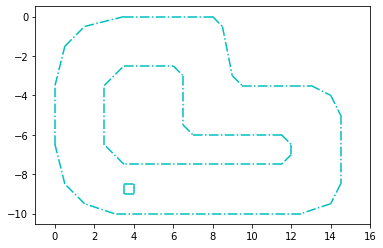

In [1]:
from trajectoire import *
from trajectoirearc import *


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib import rc
rc('animation', html='jshtml')

P=110 # 1 tour =?
[traj1,traj2]=trajectoirearc(P)

x1=traj1[0]
y1=traj1[1]
yaw1=traj1[2]
cb1=traj1[3]

x2=traj2[0]
y2=traj2[1]
yaw2=traj2[2]
cb2=traj2[3]

obst=[]

[positioninit1,positioninit2,orientationinit1,orientationinit2,vinit1,vinit2,deltat,amaxlat,epsilonmax,amax,amin,tsb,l,larg,vmax,N,rv,m,alpha,lanti]=params()
alpha=pi+atan(larg/l)


i=0
while i<len(x1):
    x1[i]=x1[i]+rv*(cos(yaw1[i]*2*pi/360+alpha)) #coordonnées du coin inférieur gauche
    y1[i]=y1[i]+rv*(sin(yaw1[i]*2*pi/360+alpha))
    x2[i]=x2[i]+rv*(cos(yaw2[i]*2*pi/360+alpha)) #coordonnées du coin inférieur gauche
    y2[i]=y2[i]+rv*(sin(yaw2[i]*2*pi/360+alpha))
    obst.append(-9+1*sin(i*2*pi*0.2*deltat/1))
    i+=1

fig = plt.figure()
plt.axis('equal')

#afficher le circuit

envir=environment()
n=len(envir)
i=0
while i<n:
    nn=len(envir[i])
    j=0
    while j<(nn-1):
        plt.plot([envir[i][j][0],envir[i][j+1][0]],[envir[i][j][1],envir[i][j+1][1]],"c-.")
        j+=1
    i+=1

ax = fig.add_subplot(111)
ax.set_xlim(-1,16)
ax.set_ylim(-11,1)

patch1 = patches.Rectangle((0, 0), 0, 0, fc='k')
patch2 = patches.Rectangle((0, 0), 0, 0, fc='r')
obstacle = patches.Rectangle((0, 0), 0, 0, fc='b')
point1, = ax.plot([], [],'ko')
point2, = ax.plot([], [],'ro')

def init():
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(obstacle)
    point1.set_data([], [])
    point2.set_data([], [])

    return (patch1,patch2,point1,point2)

def animate(i):
    patch1.set_width(0.4)
    patch1.set_height(0.2)
    patch1.set_xy([x1[i], y1[i]])
    patch1.angle = yaw1[i]
    patch2.set_width(0.4)
    patch2.set_height(0.2)
    patch2.set_xy([x2[i], y2[i]])
    patch2.angle = yaw2[i]
    obstacle.set_width(0.5)
    obstacle.set_height(0.5)
    obstacle.set_xy([11,obst[i]])
    obstacle.angle = 0
    point1.set_data(cb1[i][0], cb1[i][1])
    point2.set_data(cb2[i][0], cb2[i][1])
    return (patch1,patch2,obstacle,point1,point2)

anim = animation.FuncAnimation(fig, animate,
                               init_func=init, 
                               frames=len(x1),
                               interval=100,
                               blit=True)
print("----about to save---")
anim
#anim.save('predictifvsPID.html', writer='ffmpeg', fps=10)
plt.show()

In [2]:
anim

# AnimationTestArc

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
evitement ok
15
16
17
18
19
evitement ok
20
21
22
23
evitement ok
24
25
26
27
28
29
30
31
32
33
34
35
evitement ok
36
evitement ok
37
38
39
40
41
42
evitement ok
43
evitement ok
44
45
46
47
48
49
50
51
52
53
54
55
56
57
evitement ok
58
evitement ok
59


<Figure size 432x288 with 0 Axes>

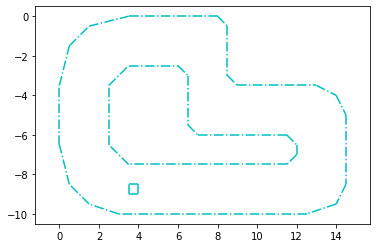

In [16]:
from trajectoirearc import *


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation
from IPython import display

P=60 #P=500 #1 tour =?
[traj1,traj2]=trajectoirearc(P)

x1=traj1[0]
y1=traj1[1]
yaw1=traj1[2]

x2=traj2[0]
y2=traj2[1]
yaw2=traj2[2]

[positioninit1,positioninit2,orientationinit1,orientationinit2,vinit1,vinit2,deltat,amaxlat,epsilonmax,amax,amin,tsb,l,larg,vmax,N,rv,m,alpha,lanti]=params()
alpha=pi+atan(larg/l)


i=0
while i<len(x1):
    x1[i]=x1[i]+rv*(cos(yaw1[i]*2*pi/360+alpha)) #coordonnées du coin inférieur gauche
    y1[i]=y1[i]+rv*(sin(yaw1[i]*2*pi/360+alpha))
    x2[i]=x2[i]+rv*(cos(yaw2[i]*2*pi/360+alpha)) #coordonnées du coin inférieur gauche
    y2[i]=y2[i]+rv*(sin(yaw2[i]*2*pi/360+alpha))
    i+=1

fig = plt.figure()
plt.show()
plt.axis('equal')

#afficher le circuit

envir=environment()
n=len(envir)
i=0
while i<n:
    nn=len(envir[i])
    j=0
    while j<(nn-1):
        plt.plot([envir[i][j][0],envir[i][j+1][0]],[envir[i][j][1],envir[i][j+1][1]],"c-.")
        j+=1
    i+=1

ax = fig.add_subplot(111)
ax.set_xlim(-1,18)
ax.set_ylim(-11,1)

patch1 = patches.Rectangle((0, 0), 0, 0, fc='k')
patch2 = patches.Rectangle((0, 0), 0, 0, fc='r')


def init():
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    return (patch1,patch2)

def animate(i):
    patch1.set_width(0.4)
    patch1.set_height(0.2)
    patch1.set_xy([x1[i], y1[i]])
    patch1.angle = yaw1[i]
    patch2.set_width(0.4)
    patch2.set_height(0.2)
    patch2.set_xy([x2[i], y2[i]])
    patch2.angle = yaw2[i]
    return (patch1,patch2)

#anim = animation.FuncAnimation(fig, animate,
 #                              frames=len(x1),
 #                              init_func=init,
 #                              interval=100,
 #                              blit=True)
#video = anim.to_html5_video()
#html = display.HTML(video)
#display.display(html)
#anim.save('tours.html', writer='ffmpeg', fps=10)
#plt.show()